<h2 style="background-color:salmon;border-radius:5px;text-align:center;padding:15px;color:white;">AI Technology Assignment - Part 3</h2>
<h4>Done by: TEY JIA YING (2027074D)<br><br>Module Code: IT3312</h4>

<h3>Overview:</h3>
I have structured the project into 5 key sections. Below, I will share with you the steps I took together with insights for each section.

PART A
1. [Data Understanding of Input Dataset](#1) <br>
2. [Data Preparation/EDA of Input Dataset](#2)<br>
3. [Modelling/Prediction/Evaluation of Input Dataset](#3)<br>
    3.1 [Building base model as stated in project guide requirements](#31) <br>
    3.2.[Tuning Hyperparameters of CNN](#32)<br>
    3.3 [Tuning Hyperparameters in .compile function](#33)<br>
    3.4 [Adding Data Augmentation](#34) <br>
    3.5 [Overall Model Comparison](#35)<br>
    3.6 [Conclusion](#36)<br>



PART B<br>
1. [Data Understanding of Cifar-10 colored Dataset](#11)<br>
2. [Data Preparation/EDA of Cifar-10 colored Dataset](#22)<br>
3. [Modelling/Prediction/Evaluation of Cifar-10 colored Dataset](#333)<br>
**<b>Note: Click on the links to go to the respective section</b>**

# PART A - Input Dataset

<a id='1'><h2 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">1. Data Understanding of Input Dataset</h2>

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from six.moves import cPickle 
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import visualkeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import visualkeras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from PIL import ImageFont, Image
#font = ImageFont.truetype("arial.ttf", 12)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
import kerastuner as kt
import cv2
import tensorflow.keras as keras

import warnings 
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",tf.keras.__version__)



Tensorflow version: 2.8.0
Keras version: 2.6.0


C:\Users\JiaYi\AppData\Local\Temp\ipykernel_27920\4204285841.py:32: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [6]:
test_batch1=pd.read_pickle("IT3312/test_batch1.pkl")

train_batch1=pd.read_pickle("IT3312/train_batch1.pkl")
train_batch2=pd.read_pickle("IT3312/train_batch2.pkl")
train_batch3=pd.read_pickle("IT3312/train_batch3.pkl")
train_batch4=pd.read_pickle("IT3312/train_batch4.pkl")
train_batch5=pd.read_pickle("IT3312/train_batch5.pkl")

In [7]:
train_data=pd.concat([train_batch1,train_batch2,train_batch3,train_batch4,train_batch5])

In [8]:
test_data=test_batch1

In [9]:
data=pd.concat([train_data,test_data])

<a id='2'><h2 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">2. Data Preparation/EDA of Input Dataset</h2>

## 2.2 Split Input Features and Label

In [10]:
X_train=train_data.iloc[:,:-1]
y_train=train_data['label']

X_test=test_data.iloc[:,:-1]
y_test=test_data['label']

In [11]:
X=data.iloc[:,:-1]
y=data['label']

## 2.3 Data Normalization - X_train/X_test

In [12]:
X_train/=255
X_test/=255
X/=255


In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(50000, 1024) (50000,)
(10000, 1024) (10000,)


In [14]:
print(X.shape,y.shape)

(60000, 1024) (60000,)


## 2.4 Data Reshaping - X_train/X_test

In [15]:
#building the input vector from the 32x32 pixels
X_train = X_train.values.reshape(50000, 32, 32, 1)
X_test = X_test.values.reshape(10000, 32, 32, 1)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(50000, 32, 32, 1) (50000,)
(10000, 32, 32, 1) (10000,)


## 2.5 Data Encoding - y_train/y_test

Encode target labels with value between 0 and n_classes-1.

In [17]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

<a id='3'><h2 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3. Modelling, Evaluation and Prediction of Input Dataset</h2>

For modelling stage, for each CNN model i will be tuning the hyper parameters, tuning the data(data augmentation) and also tuning the model layers.This will be the overview of this section:<br>
3. [Modelling/Prediction/Evaluation](#3)<br>
    3.1 [Building base model as stated in project guide requirements](#31) <br>
    3.2.[Tuning Hyperparameters of CNN](#32)<br>
            <ul>
    <li>3.2.1 [Tuning Conv2D layer](#321)</li>
    <li>3.2.2 [Tuning Dropout layer](#322)</li>
    <li> 3.2.3 [Tuning Batch Normalization layer](#323)</li>
    <li>3.2.4 [Tuning Dense layer](#324)</li>
    <li>3.2.5 [Tuning Activation Function](#325)</li>
            </ul>
    3.3 [Tuning Hyperparameters in .compile function](#33)
    <ul>
             <li>3.3.1 [Tuning Optimizer](#331)</li>
             <li>3.3.2 [Tuning Learning Rate](#332)</li>
              <li>3.3.3 [Tuning Batch Size](#333)</li>
               <li> 3.3.4 [Tuning Loss Function](#334)</li>
                <li>3.3.5 [Best combinatin of hyperparameters](#335)</li>  
    </ul>
    3.4 [Adding Data Augmentation](#34) <br>
    3.5 [Overall Model Comparison](#35)<br>


<b>Metrics used: </b><br>
F1-score as for this use case, both recall and precision are important 

<a id='31'><h2 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3.1 CNN-1: CNN base model</h2>

## A: Building Base Model - CNN-1

The base model will be built based on the project guide requirements as stated in the project guide. I will first be building 3 Convolutional 2D layers followed by Max Pooling 2D layer as it is a great way to reduce the size of parameters with out loosing much information. 

After building 3 consecutive layer, I will then flatten the intermediate layers results and pass them to a Dense network. Then the dense network result will be passes to a final output layer where the number of units represent the number of categories in the data which is 10 in our case. Softmax is chosen as final activation because we need the highest probable class out of 10.

In [19]:
from keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [3]:
def build_CNN_1():
    CNN_1 = Sequential()
    CNN_1.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(32, 32,1)))
    CNN_1.add(MaxPooling2D((2, 2)))
    CNN_1.add(Conv2D(64, (3, 3),  activation='relu'))
    CNN_1.add(MaxPooling2D((2, 2)))
    CNN_1.add(Conv2D(64, (3, 3), activation='relu'))
    CNN_1.add(MaxPooling2D((2, 2)))
    CNN_1.add(Flatten())
    CNN_1.add(Dense(64, activation='relu'))
    CNN_1.add(Dense(10, activation='softmax'))
    return CNN_1
CNN_1=build_CNN_1()
CNN_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

Next, I have used the visualkeras function to better visualize and view the model.

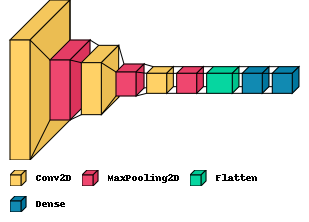

In [4]:
visualkeras.layered_view(CNN_1, legend=True)

Now, we will start training the model. Take note that I have used EarlyStopping to train till the epoch that will give the optimum accuracy.

In [20]:
CNN_1=build_CNN_1()
CNN_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_1_history = CNN_1.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 11s 4ms/step - loss: 1.8252 - accuracy: 0.3368 - val_loss: 1.5524 - val_accuracy: 0.4539
Epoch 2/500
625/625 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.4853 - val_loss: 1.4014 - val_accuracy: 0.5016
Epoch 3/500
625/625 [==============================] - 2s 3ms/step - loss: 1.3188 - accuracy: 0.5443 - val_loss: 1.2558 - val_accuracy: 0.5648
Epoch 4/500
625/625 [==============================] - 2s 3ms/step - loss: 1.2058 - accuracy: 0.5809 - val_loss: 1.2342 - val_accuracy: 0.5725
Epoch 5/500
625/625 [==============================] - 2s 3ms/step - loss: 1.1286 - accuracy: 0.6094 - val_loss: 1.1840 - val_accuracy: 0.5884
Epoch 6/500
625/625 [==============================] - 2s 3ms/step - loss: 1.0761 - accuracy: 0.6277 - val_loss: 1.0928 - val_accuracy: 0.6175
Epoch 7/500
625/625 [==============================] - 2s 3ms/step - loss: 1.0151 - accuracy: 0.6474 - val_loss: 1.0584 - val_accuracy: 0.635

## B: Model Evaluation

In [21]:
preds = CNN_1.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      1000
           1       0.81      0.80      0.80      1000
           2       0.57      0.50      0.53      1000
           3       0.45      0.52      0.48      1000
           4       0.53      0.71      0.61      1000
           5       0.73      0.41      0.53      1000
           6       0.69      0.78      0.73      1000
           7       0.74      0.69      0.71      1000
           8       0.75      0.80      0.77      1000
           9       0.81      0.76      0.79      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

Macro F1-score: 0.6652326744791927


In [22]:
accuracy = CNN_1.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)

313/313 - 0s - loss: 1.0218 - accuracy: 0.6666
Accuracy: 66.6599988937378


As shown in the classification report, the f1-score is 66%, which is not that great but still as we are using a very simple model without any fine tuning. If we perform more tweeks, we can still acheive pretty good accuracy. 

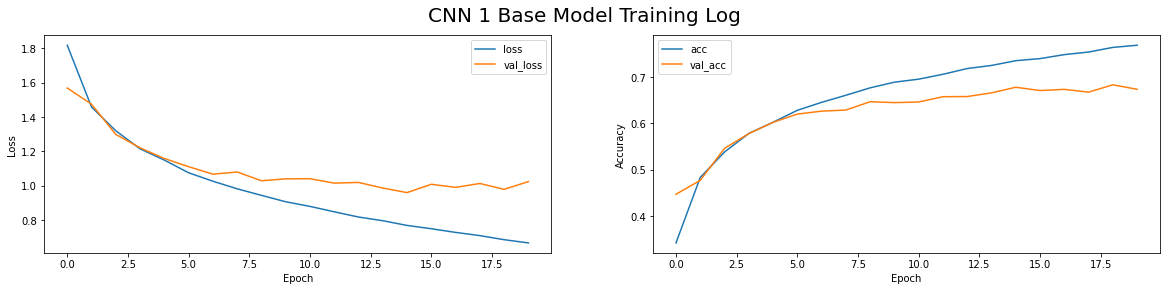

In [23]:
loss = CNN_1_history.history['loss']
val_loss = CNN_1_history.history['val_loss']
acc = CNN_1_history.history['accuracy']
val_acc = CNN_1_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 1 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

As shown in the model training log, the base model has major underfitting as the validation loss increases as more training is done while the accuracy decreases as there is more training. The validation accuracy decreases and deviates from the training accuracy as the epoch increases. Even though the overfitting is not big and the difference between the val_acc/val_loss and acc/loss is not big, we will still need to fine tune the CNN model, hyperparameters in the neural network and also explore some data augmentation in the later stages.

<img src="light-bulb.png" align='left' height="50" width="70"><h2>Conclusion: CNN_1 Base Model F1-Score is 65%</h2>

<a id='32'><h2 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3.2 Tuning Hyperparameters in CNN</h2>

In this section, I will be tuning the layers of the base model.It will include these few sections:
<br>
<h4><b>3.2.1. Tuning Conv2D layer</b></h4>
3.2.1.1 Adding Conv2D layers<br>
3.2.1.2. Tuning Number of neurons in Conv2d layer<br>

<h4><b>3.2.2. Tuning Dropout layer</b></h4>
3.2.2.1. Adding Dropout layers<br>
3.2.2.2. Tuning Dropout Rate<br>

<h4><b>3.2.3. Tuning Batch Normalization layer</b></h4>
3.2.3.1. Adding Batch Normalization layers<br>

<h4><b>3.2.4. Tuning Dense layer</b></h4>
3.2.4.1.Tuning Number of neurons in dense layer<br>

<h4><b>3.2.5. Tuning Activation Function</b></h4>
3.2.5.1.Tuning Activation Function

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.2.1 Tuning Conv2D layer</h2><br>

## 3.2.1.1 Adding Conv2d Layer

Now I will be increasing the depth of the model to increase its capacity as those with many hidden layers can be computationally more efficient than training a model that has lesser number of layers with vast number of nodes

I will be adding one Conv2d layer after each Conv2d layer

## 3.2.1.1.1 CNN 2: Doubling Conv2d Layer

In [23]:
def build_CNN_2():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(32,32,1)))
    model.add(Conv2D(32,(3,3),activation="relu", padding='same'))
    model.add(MaxPooling2D(2,2))
    

    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(MaxPooling2D(2,2))
    

    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    
    model.add(MaxPooling2D(2,2))
    
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    
    model.add(Dense(10,activation='softmax'))
    return model
CNN_2=build_CNN_2()
CNN_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)         

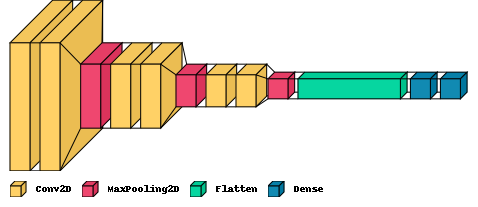

In [24]:
visualkeras.layered_view(CNN_2, legend=True)

In [25]:
CNN_2=build_CNN_2()
CNN_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_2_history = CNN_2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 4s 6ms/step - loss: 1.7480 - accuracy: 0.3638 - val_loss: 1.3421 - val_accuracy: 0.5237
Epoch 2/500
625/625 [==============================] - 3s 5ms/step - loss: 1.2018 - accuracy: 0.5798 - val_loss: 1.0556 - val_accuracy: 0.6315
Epoch 3/500
625/625 [==============================] - 3s 5ms/step - loss: 0.9745 - accuracy: 0.6611 - val_loss: 0.9505 - val_accuracy: 0.6720
Epoch 4/500
625/625 [==============================] - 4s 6ms/step - loss: 0.8317 - accuracy: 0.7123 - val_loss: 0.8595 - val_accuracy: 0.7018
Epoch 5/500
625/625 [==============================] - 3s 5ms/step - loss: 0.7269 - accuracy: 0.7470 - val_loss: 0.8469 - val_accuracy: 0.7065
Epoch 6/500
625/625 [==============================] - 3s 5ms/step - loss: 0.6459 - accuracy: 0.7767 - val_loss: 0.8018 - val_accuracy: 0.7318
Epoch 7/500
625/625 [==============================] - 4s 6ms/step - loss: 0.5705 - accuracy: 0.8012 - val_loss: 0.8247 - val_accuracy: 0.7291

In [26]:
preds = CNN_2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1000
           1       0.85      0.86      0.85      1000
           2       0.54      0.64      0.59      1000
           3       0.54      0.55      0.54      1000
           4       0.67      0.71      0.69      1000
           5       0.72      0.56      0.63      1000
           6       0.75      0.78      0.76      1000
           7       0.81      0.72      0.76      1000
           8       0.81      0.86      0.83      1000
           9       0.84      0.81      0.83      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000

313/313 - 1s - loss: 1.0749 - accuracy: 0.7228
Accuracy: 72.28000164031982
Macro F1-score: 0.7231424691248046


We can see that by adding double layer of Conv2d, the accuracy has increased to 72% from the original 65% which is a good sign

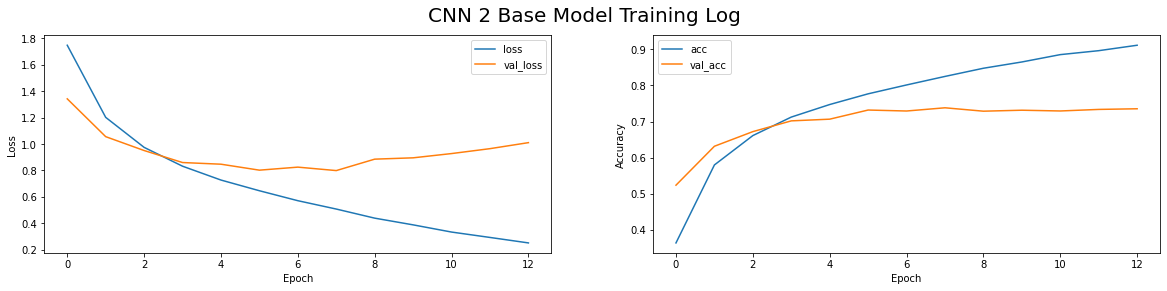

In [28]:
loss = CNN_2_history.history['loss']
val_loss = CNN_2_history.history['val_loss']
acc = CNN_2_history.history['accuracy']
val_acc = CNN_2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 2 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




However, as shown in the model training log, the CNN 2 Version 2 model has increased underfitting as the validation loss increases as more training is done while the accuracy decreases as there is more training. The validation accuracy decreases and deviates from the training accuracy as the epoch increases. We will still need to fine tune the CNN model in the the later section (Dropout section)

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td><b>Model</b></td>
        <td><b>Accuracy</b></td>
        <td><b>Precision</b></td>
        <td><b>Recall</b></td>
        <td><b>f1-score</b></td>
    </thead>
    <tr>
        <td>CNN_1 - Base Model (Based on Project Guide)</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.65</td>
    </tr>
    <tr>
        <td style="background-color:#48AAAD;color:white;">CNN_2 Base Model - CNN_1 + Added Conv2d layers</td>
        <td style="background-color:#48AAAD;color:white;">0.72</td>
        <td style="background-color:#48AAAD;color:white;">0.73</td>
        <td style="background-color:#48AAAD;color:white;">0.72</td>
        <td style="background-color:#48AAAD;color:white;">0.72</td>
    </tr>
    
</table>

## 3.2.1.2 Tuning Number of Neurons for Conv2d Layer

Now after I have added Conv2d layers, I will be tuning the neurons combination for each double layer. Currently the combination of the number of neurons is 32, 64, 64. I will be trying all combinations of neurons number from 32,64,128,256,512 for each pair of layer and see which combinations will be best optimum f1-score. 

I will first be building a CNN_3 model building function as it will be easier to call out the function for each neuron combinations and fit in the values

In [23]:
def build_CNN_3(n1,n2,n3):
    model=Sequential()
    model.add(Conv2D(n1,(3,3),activation="relu", padding='same',input_shape=(32,32,1)))
    model.add(Conv2D(n1,(3,3),activation="relu", padding='same'))
    model.add(MaxPooling2D(2,2))
    

    model.add(Conv2D(n2,(3,3),activation="relu", padding='same'))
    model.add(Conv2D(n2,(3,3),activation="relu", padding='same'))
    model.add(MaxPooling2D(2,2))
    

    model.add(Conv2D(n3,(3,3),activation="relu", padding='same'))
    model.add(Conv2D(n3,(3,3),activation="relu", padding='same'))
    
    model.add(MaxPooling2D(2,2))
    
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    
    model.add(Dense(10,activation='softmax'))
    return model

<b>Neurons Combination  :</b>
1. 16 32 64
2. 32 64 128
2. 64 128 256
3. 128 256 512

## 3.2.1.2.1 CNN 3 v0: Neurons Combination 1: 16,32,64

In [24]:
CNN_3_v0=build_CNN_3(16,32,64)
CNN_3_v0.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 64)         

In [25]:
CNN_3_v0.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_3_v0_history = CNN_3_v0.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 7s 4ms/step - loss: 1.7392 - accuracy: 0.3632 - val_loss: 1.4069 - val_accuracy: 0.4968
Epoch 2/500
625/625 [==============================] - 2s 4ms/step - loss: 1.3169 - accuracy: 0.5323 - val_loss: 1.1722 - val_accuracy: 0.5860
Epoch 3/500
625/625 [==============================] - 2s 4ms/step - loss: 1.1238 - accuracy: 0.6067 - val_loss: 1.0549 - val_accuracy: 0.6335
Epoch 4/500
625/625 [==============================] - 2s 4ms/step - loss: 0.9800 - accuracy: 0.6568 - val_loss: 0.9601 - val_accuracy: 0.6636
Epoch 5/500
625/625 [==============================] - 2s 4ms/step - loss: 0.8749 - accuracy: 0.6952 - val_loss: 0.9135 - val_accuracy: 0.6829
Epoch 6/500
625/625 [==============================] - 2s 4ms/step - loss: 0.7869 - accuracy: 0.7244 - val_loss: 0.9177 - val_accuracy: 0.6846
Epoch 7/500
625/625 [==============================] - 2s 4ms/step - loss: 0.7179 - accuracy: 0.7494 - val_loss: 0.8370 - val_accuracy: 0.7114

In [26]:
preds = CNN_3_v0.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_3_v0.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1000
           1       0.79      0.89      0.83      1000
           2       0.75      0.45      0.56      1000
           3       0.53      0.50      0.51      1000
           4       0.69      0.59      0.64      1000
           5       0.52      0.72      0.61      1000
           6       0.70      0.81      0.75      1000
           7       0.79      0.74      0.77      1000
           8       0.84      0.79      0.82      1000
           9       0.81      0.81      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

313/313 - 1s - loss: 0.9874 - accuracy: 0.7089
Accuracy: 70.8899974822998
Macro F1-score: 0.7057414029372829


This neurons combination caused a decreased in perfromance as the f1- score dropped from the original 72% to 70% as lesser neurons is used from the previous CNN2 model

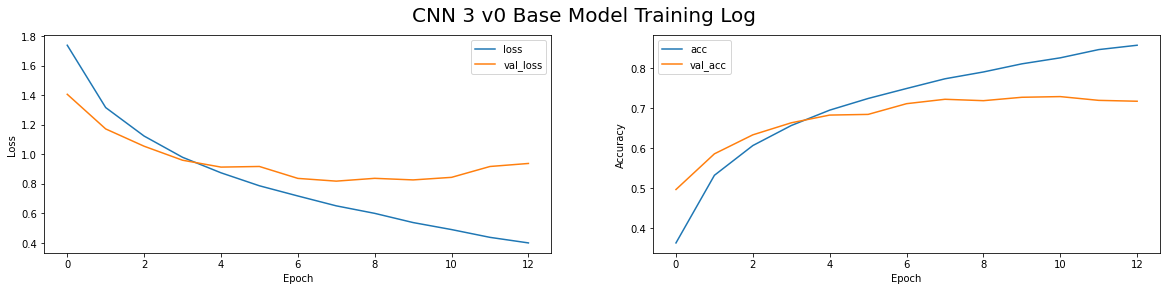

In [27]:
loss = CNN_3_v0_history.history['loss']
val_loss = CNN_3_v0_history.history['val_loss']
acc = CNN_3_v0_history.history['accuracy']
val_acc = CNN_3_v0_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 3 v0 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




As shown in the model training log, the CNN 3 Version 0 model has soem overfitting at the start followed by major undefitting as the validation loss increases as more training is done while the accuracy decreases as there is more training. The validation accuracy decreases and deviates from the training accuracy as the epoch increases. We will still need to fine tune the CNN model in the the later section (Dropout section). Hence, this model is not good performing. Now I will be increasing the neurons in the next section. 

## 3.2.1.2.2 CNN 3 v1 Neurons Combination 1: 32, 64, 128

In [28]:
CNN_3_v1=build_CNN_3(32,64,128)
CNN_3_v1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 128)        

In [29]:
CNN_3_v1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_3_v1_history = CNN_3_v1.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 4s 6ms/step - loss: 1.7361 - accuracy: 0.3618 - val_loss: 1.3122 - val_accuracy: 0.5379
Epoch 2/500
625/625 [==============================] - 4s 6ms/step - loss: 1.1809 - accuracy: 0.5839 - val_loss: 1.0435 - val_accuracy: 0.6373
Epoch 3/500
625/625 [==============================] - 3s 5ms/step - loss: 0.9325 - accuracy: 0.6755 - val_loss: 0.9018 - val_accuracy: 0.6924
Epoch 4/500
625/625 [==============================] - 3s 6ms/step - loss: 0.7682 - accuracy: 0.7352 - val_loss: 0.8239 - val_accuracy: 0.7141
Epoch 5/500
625/625 [==============================] - 4s 6ms/step - loss: 0.6458 - accuracy: 0.7766 - val_loss: 0.7952 - val_accuracy: 0.7296
Epoch 6/500
625/625 [==============================] - 4s 6ms/step - loss: 0.5433 - accuracy: 0.8106 - val_loss: 0.7761 - val_accuracy: 0.7482
Epoch 7/500
625/625 [==============================] - 3s 6ms/step - loss: 0.4491 - accuracy: 0.8439 - val_loss: 0.7929 - val_accuracy: 0.7480

In [30]:
preds = CNN_3_v1.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_3_v1.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.84      0.89      0.86      1000
           2       0.61      0.64      0.62      1000
           3       0.55      0.51      0.53      1000
           4       0.69      0.71      0.70      1000
           5       0.68      0.62      0.65      1000
           6       0.77      0.78      0.78      1000
           7       0.75      0.80      0.77      1000
           8       0.82      0.84      0.83      1000
           9       0.84      0.81      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

313/313 - 1s - loss: 1.1322 - accuracy: 0.7348
Accuracy: 73.47999811172485
Macro F1-score: 0.7335395749600165


As the neurons increased to 32, 64, 128 from the original combination of 32, 64,64, the doubled neurons for the last layer has increased the f1-sscore from 72% to 73%. It is a good sign, hence, we will keep on adding the neurons in the next stage.

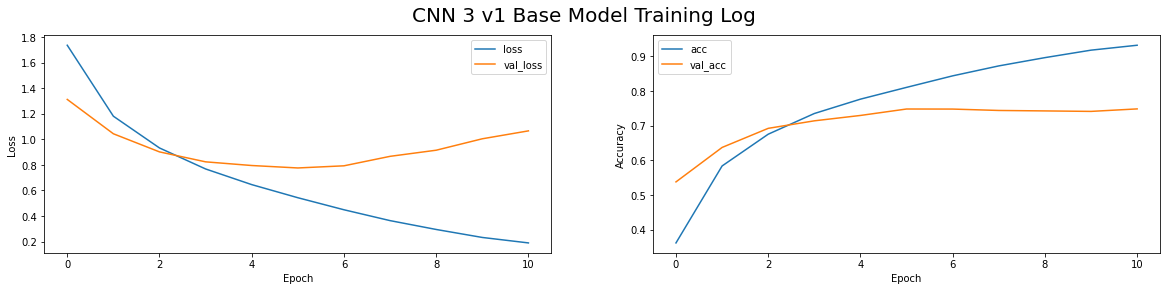

In [31]:
loss = CNN_3_v1_history.history['loss']
val_loss = CNN_3_v1_history.history['val_loss']
acc = CNN_3_v1_history.history['accuracy']
val_acc = CNN_3_v1_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 3 v1 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




As the neurons combination increased, it also caused underfitting to occur at an earlier stage when epoch was only 2. Hence we will need to fin tune the CNN model in the later section(Dropout layer). For now, we will focus on improving model performance first.

## 3.2.1.2.2 Neurons Combination 2: 64, 128, 256

In [32]:
CNN_3_v2=build_CNN_3(64,128,256)
CNN_3_v2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 256)        

In [34]:
CNN_3_v2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_3_v2_history = CNN_3_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 9s 12ms/step - loss: 1.8604 - accuracy: 0.3094 - val_loss: 1.5402 - val_accuracy: 0.4461
Epoch 2/500
625/625 [==============================] - 8s 12ms/step - loss: 1.3052 - accuracy: 0.5364 - val_loss: 1.1063 - val_accuracy: 0.6070
Epoch 3/500
625/625 [==============================] - 7s 12ms/step - loss: 1.0060 - accuracy: 0.6499 - val_loss: 0.9400 - val_accuracy: 0.6787
Epoch 4/500
625/625 [==============================] - 7s 12ms/step - loss: 0.8299 - accuracy: 0.7117 - val_loss: 0.8446 - val_accuracy: 0.7107
Epoch 5/500
625/625 [==============================] - 7s 12ms/step - loss: 0.6920 - accuracy: 0.7592 - val_loss: 0.7716 - val_accuracy: 0.7433
Epoch 6/500
625/625 [==============================] - 7s 12ms/step - loss: 0.5864 - accuracy: 0.7977 - val_loss: 0.7676 - val_accuracy: 0.7398
Epoch 7/500
625/625 [==============================] - 7s 12ms/step - loss: 0.4791 - accuracy: 0.8329 - val_loss: 0.7830 - val_accuracy:

In [35]:
preds = CNN_3_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_3_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1000
           1       0.86      0.86      0.86      1000
           2       0.62      0.64      0.63      1000
           3       0.56      0.50      0.53      1000
           4       0.71      0.64      0.67      1000
           5       0.66      0.66      0.66      1000
           6       0.76      0.81      0.78      1000
           7       0.77      0.78      0.78      1000
           8       0.86      0.81      0.84      1000
           9       0.74      0.88      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

313/313 - 1s - loss: 1.1151 - accuracy: 0.7318
Accuracy: 73.18000197410583
Macro F1-score: 0.7300428602646897


We can see that as the neurons increased to 64, 128, 256 the model perfromance did not increase at all. It remained stagnant at 73%. Hence, we will be using the previous model as it gives the same performance with lesser parameters

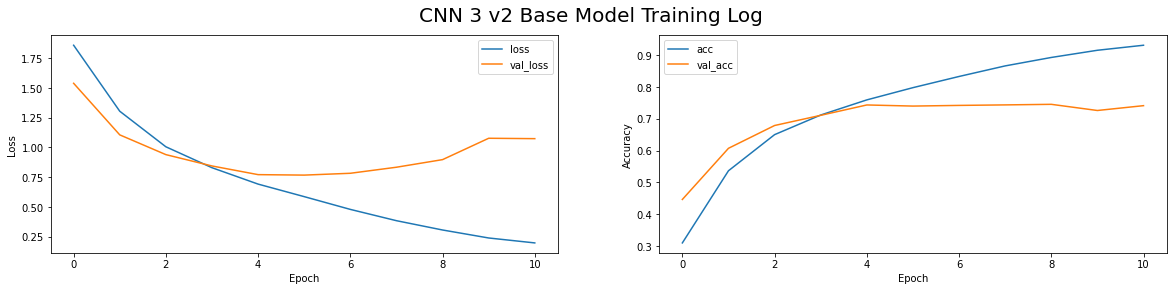

In [36]:
loss = CNN_3_v2_history.history['loss']
val_loss = CNN_3_v2_history.history['val_loss']
acc = CNN_3_v2_history.history['accuracy']
val_acc = CNN_3_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 3 v2 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

As the neurons combination increased, it also caused underfitting to occur at an earlier stage when epoch was only 2. Hence we will need to fin tune the CNN model in the later section(Dropout layer). For now, we will focus on improving model performance first.

## 3.2.1.2.3 Neurons Combination 3: 128, 256, 512

In [37]:
CNN_3_v3=build_CNN_3(128,256,512)
CNN_3_v3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 128)       1280      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 512)        

In [39]:
CNN_3_v3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_3_v3_history = CNN_3_v3.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 19s 28ms/step - loss: 1.8680 - accuracy: 0.3047 - val_loss: 1.4509 - val_accuracy: 0.4719
Epoch 2/500
625/625 [==============================] - 17s 27ms/step - loss: 1.2655 - accuracy: 0.5493 - val_loss: 1.0410 - val_accuracy: 0.6349
Epoch 3/500
625/625 [==============================] - 17s 27ms/step - loss: 0.9382 - accuracy: 0.6729 - val_loss: 0.8611 - val_accuracy: 0.7006
Epoch 4/500
625/625 [==============================] - 17s 27ms/step - loss: 0.7537 - accuracy: 0.7377 - val_loss: 0.8015 - val_accuracy: 0.7225
Epoch 5/500
625/625 [==============================] - 17s 28ms/step - loss: 0.6188 - accuracy: 0.7857 - val_loss: 0.7768 - val_accuracy: 0.7412
Epoch 6/500
625/625 [==============================] - 17s 28ms/step - loss: 0.4998 - accuracy: 0.8250 - val_loss: 0.7234 - val_accuracy: 0.7622
Epoch 7/500
625/625 [==============================] - 18s 29ms/step - loss: 0.3857 - accuracy: 0.8653 - val_loss: 0.8323 - val_ac

In [40]:
preds = CNN_3_v3.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_3_v3.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1000
           1       0.84      0.86      0.85      1000
           2       0.61      0.65      0.63      1000
           3       0.57      0.52      0.54      1000
           4       0.67      0.70      0.68      1000
           5       0.63      0.67      0.65      1000
           6       0.81      0.77      0.79      1000
           7       0.88      0.73      0.80      1000
           8       0.86      0.83      0.85      1000
           9       0.84      0.84      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

313/313 - 2s - loss: 1.2324 - accuracy: 0.7389
Accuracy: 73.89000058174133
Macro F1-score: 0.7394277856365191


We can see that with a higher number of neurons, the model f1-score did increased a little by 0.9%. As the parameters is reaching 5 million, I would be choosing the CNN 3 v1 model as it gives roughly the same result and uses less paramaters to train

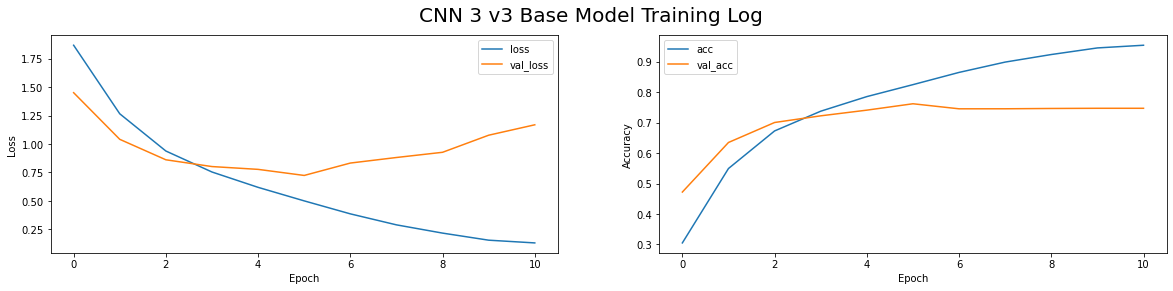

In [41]:
loss = CNN_3_v3_history.history['loss']
val_loss = CNN_3_v3_history.history['val_loss']
acc = CNN_3_v3_history.history['accuracy']
val_acc = CNN_3_v3_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 3 v3 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

As the neurons combination increased, it also caused underfitting to occur at an earlier stage when epoch was only 2. Hence we will need to fin tune the CNN model in the later section(Dropout layer). For now, we will focus on improving model performance first.

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td><b>Fine Tuning Stage</b></td>
        <td><b>Model</b></td>
        <td><b>Accuracy</b></td>
        <td><b>Precision</b></td>
        <td><b>Recall</b></td>
        <td><b>f1-score</b></td>
        <td><b>Model Training Log</b></td>
    </thead>
    <tr>
        <td>Building Base Model</td>
        <td>CNN_1 - Base Model (Based on Project Guide)</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.65</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5">Tuning Conv2D Layer</td>
        <td>CNN_2 - CNN_1 + Added Conv2d layers</td>
        <td>0.72</td>
        <td>0.73</td>
        <td>0.72</td>
        <td>0.72</td>
        <td rowspan="5" >Underfitting</td>
    </tr>
    <tr>
        <td >CNN 3 v0: CNN 2 + Neuron Combination [16,32,64]</td>
        <td>0.71</td>
        <td>0.72</td>
        <td>0.71</td>
        <td>0.71</td>
    </tr>
    <tr>
        <td style="background-color:#48AAAD;color:white;">CNN 3 v1: CNN 2 + Neuron Combination [32,64,128]</td>
        <td style="background-color:#48AAAD;color:white;">0.73</td>
        <td style="background-color:#48AAAD;color:white;">0.73</td>
        <td style="background-color:#48AAAD;color:white;">0.73</td>
        <td style="background-color:#48AAAD;color:white;">0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v2: CNN 2 + Neuron Combination [64,128,256]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v3: CNN 2 + Neuron Combination [126, 256, 512]</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
    </tr>
    
    
</table>

I will be choosing <b>CNN 3 v1</b> as it gives a increased model performance  with 400,000 paramaters as compared to CNN 3v2 which has 5 million paramaters. The trade off for results to paramaters is not worth it. Hence I will be looking for other ways to improve the model performance in the later stages

<img src="light-bulb.png" align='left' height="50" width="70"><h2>Conclusion: CNN 3 v1 F1-Score is 73%</h2>

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.2.2 Tuning Dropout layer</h2><br>

To allow for better model training(no over or underfitting), I will be adding some regularization techniques which in this case, adding dropout layer. Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

## 3.2.2.1 CNN 4 v1: Adding Dropout Layer

As Dropout rate is between 0 to 1, o have no bias, I will setting the first dropout rate to 0.5 which is a middle point between 0 and 1. I will be adding the Dropout layer to under every max pooling layer to create a significant difference. If I add the dropout layer before the max pooling layer, the number of dead neurons would be greater than or equal to that if I add the dropout layer after the max pooling layer. 

In [30]:
CNN_4_v1=Sequential()
CNN_4_v1.add(Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(32,32,1)))
CNN_4_v1.add(Conv2D(32,(3,3),activation="relu", padding='same'))
CNN_4_v1.add(MaxPooling2D(2,2))
CNN_4_v1.add(Dropout(0.5))

CNN_4_v1.add(Conv2D(64,(3,3),activation="relu", padding='same'))
CNN_4_v1.add(Conv2D(64,(3,3),activation="relu", padding='same'))
CNN_4_v1.add(MaxPooling2D(2,2))
CNN_4_v1.add(Dropout(0.5))


CNN_4_v1.add(Conv2D(128,(3,3),activation="relu", padding='same'))
CNN_4_v1.add(Conv2D(128,(3,3),activation="relu", padding='same'))
CNN_4_v1.add(MaxPooling2D(2,2))
CNN_4_v1.add(Dropout(0.5))

CNN_4_v1.add(Flatten())
CNN_4_v1.add(Dense(64,activation='relu'))
CNN_4_v1.add(Dropout(0.5))
CNN_4_v1.add(Dense(10,activation='softmax'))
CNN_4_v1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)         

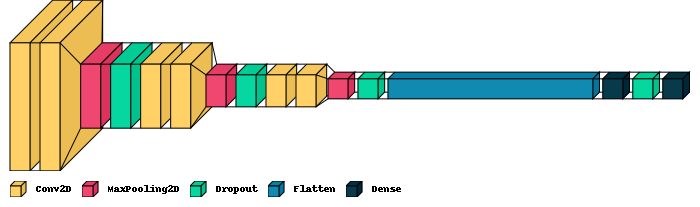

In [31]:
visualkeras.layered_view(CNN_4_v1, legend=True)

In [32]:
CNN_4_v1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_4_v1_history = CNN_4_v1.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 5s 6ms/step - loss: 2.0593 - accuracy: 0.2255 - val_loss: 1.7895 - val_accuracy: 0.3412
Epoch 2/500
625/625 [==============================] - 4s 6ms/step - loss: 1.7311 - accuracy: 0.3619 - val_loss: 1.6034 - val_accuracy: 0.4261
Epoch 3/500
625/625 [==============================] - 4s 6ms/step - loss: 1.5640 - accuracy: 0.4316 - val_loss: 1.4059 - val_accuracy: 0.5012
Epoch 4/500
625/625 [==============================] - 4s 6ms/step - loss: 1.4587 - accuracy: 0.4832 - val_loss: 1.3700 - val_accuracy: 0.5094
Epoch 5/500
625/625 [==============================] - 4s 6ms/step - loss: 1.3734 - accuracy: 0.5158 - val_loss: 1.2542 - val_accuracy: 0.5620
Epoch 6/500
625/625 [==============================] - 4s 6ms/step - loss: 1.3032 - accuracy: 0.5429 - val_loss: 1.0441 - val_accuracy: 0.6301
Epoch 7/500
625/625 [==============================] - 4s 6ms/step - loss: 1.2418 - accuracy: 0.5679 - val_loss: 1.0851 - val_accuracy: 0.6176

In [50]:
preds = CNN_4_v1.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_4_v1.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.84      0.64      0.72      1000
           1       0.91      0.79      0.85      1000
           2       0.70      0.39      0.50      1000
           3       0.44      0.60      0.51      1000
           4       0.61      0.66      0.63      1000
           5       0.55      0.64      0.59      1000
           6       0.55      0.89      0.68      1000
           7       0.86      0.62      0.72      1000
           8       0.91      0.74      0.82      1000
           9       0.79      0.84      0.82      1000

    accuracy                           0.68     10000
   macro avg       0.72      0.68      0.68     10000
weighted avg       0.72      0.68      0.68     10000

313/313 - 1s - loss: 0.9503 - accuracy: 0.6805
Accuracy: 68.04999709129333
Macro F1-score: 0.683772790779732


We can see that the Dropout layer have decreased the f1 score to 68%. Hence, I will need to tune the dropout layer value in the later section

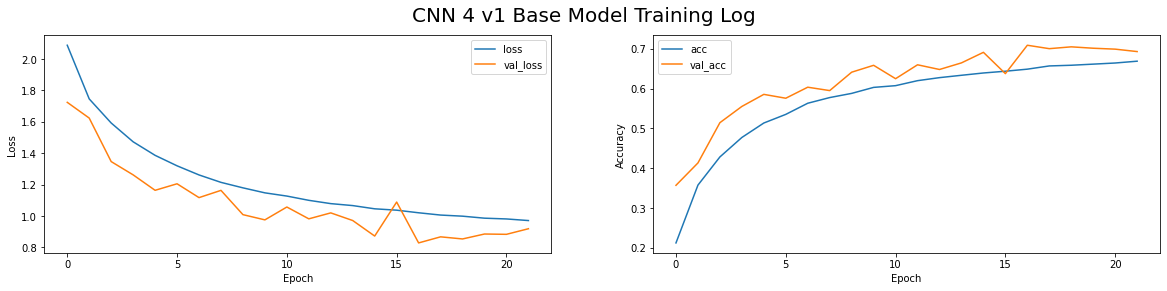

In [67]:
loss = CNN_4_v1_history.history['loss']
val_loss = CNN_4_v1_history.history['val_loss']
acc = CNN_4_v1_history.history['accuracy']
val_acc = CNN_4_v1_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 4 v1 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can see that even though there is still overfitting, the deviation of the validation loss and the train loss have closed up! 
Even though the model perfromance has dropped slightly, the problem of overfitting/underfitting has been reduced greatly as the val_loss and val_acc are deviating towards the training accuracy and loss. This is a good sign. Hence, we will keep the dropout layers.In the next section, to close up the deviation we will be tuning the dropout layer value

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td><b>Fine Tuning Stage</b></td>
        <td><b>Model</b></td>
        <td><b>Accuracy</b></td>
        <td><b>Precision</b></td>
        <td><b>Recall</b></td>
        <td><b>f1-score</b></td>
        <td><b>Model Training Log</b></td>
    </thead>
    <tr>
        <td>Building Base Model</td>
        <td>CNN_1 - Base Model (Based on Project Guide)</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.65</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5">Tuning Conv2D Layer</td>
        <td>CNN_2 - CNN_1 + Added Conv2d layers</td>
        <td>0.72</td>
        <td>0.73</td>
        <td>0.72</td>
        <td>0.72</td>
        <td rowspan="5" >Underfitting</td>
    </tr>
    <tr>
        <td >CNN 3 v0: CNN 2 + Neuron Combination [16,32,64]</td>
        <td>0.71</td>
        <td>0.72</td>
        <td>0.71</td>
        <td>0.71</td>
    </tr>
    <tr>
        <td style="background-color:#48AAAD;color:white;">CNN 3 v1: CNN 2 + Neuron Combination [32,64,128]</td>
        <td style="background-color:#48AAAD;color:white;">0.73</td>
        <td style="background-color:#48AAAD;color:white;">0.73</td>
        <td style="background-color:#48AAAD;color:white;">0.73</td>
        <td style="background-color:#48AAAD;color:white;">0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v2: CNN 2 + Neuron Combination [64,128,256]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v3: CNN 2 + Neuron Combination [126, 256, 512]</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
    </tr>
    <tr>
        <td rowspan="1">Tuning Dropout Layer</td>
        <td>CNN 4 v1 - CNN 3 v1 + Added Dropout layers</td>
        <td>0.68</td>
        <td>0.72</td>
        <td>0.68</td>
        <td>0.68</td>
        <td>Slight Overfitting</td>
    </tr>
    
    
</table>

## 3.2.2.3 Tuning Dropout Layer

As the model performance has dropped in the previous section, we will need to find the optimum dropout rate that gives the highest f1-score. I have done a function where it will be easier to call the function and fit in different Dropout rates

In [ ]:
def build_CNN_4(d1,d2,d3,d4):
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(32,32,1)))
    model.add(Conv2D(32,(3,3),activation="relu", padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(d1))

    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(d1))


    model.add(Conv2D(128,(3,3),activation="relu", padding='same'))
    model.add(Conv2D(128,(3,3),activation="relu", padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(d1))

    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(d1))
    model.add(Dense(10,activation='softmax'))
    return model


## 3.2.2.3.1 CNN 4 v2: Ascending Dropout Layer Combination - [0.2, 0.3, 0.4, 0.5]

First, I will be trying out ascending dropout layer combiantion that starts from 0.2 has we do not want too heavy dropout that misses out on the data

In [62]:
CNN_4_v2=build_CNN_4(0.2, 0.3, 0.4, 0.5)
CNN_4_v2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 8, 8, 64)        

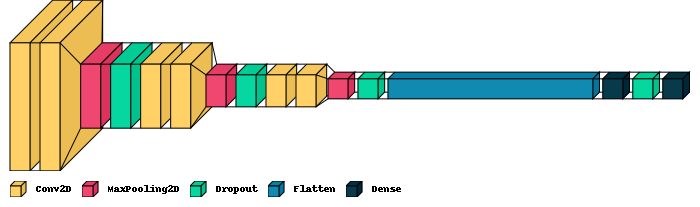

In [63]:
visualkeras.layered_view(CNN_4_v2, legend=True)

In [64]:
CNN_4_v2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_4_v2_history = CNN_4_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 4s 6ms/step - loss: 2.0909 - accuracy: 0.2130 - val_loss: 1.6676 - val_accuracy: 0.4028
Epoch 2/500
625/625 [==============================] - 4s 6ms/step - loss: 1.6157 - accuracy: 0.4137 - val_loss: 1.3243 - val_accuracy: 0.5163
Epoch 3/500
625/625 [==============================] - 4s 6ms/step - loss: 1.3982 - accuracy: 0.5046 - val_loss: 1.1625 - val_accuracy: 0.5842
Epoch 4/500
625/625 [==============================] - 4s 6ms/step - loss: 1.2647 - accuracy: 0.5584 - val_loss: 1.0230 - val_accuracy: 0.6400
Epoch 5/500
625/625 [==============================] - 4s 6ms/step - loss: 1.1704 - accuracy: 0.5932 - val_loss: 0.9450 - val_accuracy: 0.6674
Epoch 6/500
625/625 [==============================] - 4s 6ms/step - loss: 1.1035 - accuracy: 0.6206 - val_loss: 0.9031 - val_accuracy: 0.6817
Epoch 7/500
625/625 [==============================] - 4s 7ms/step - loss: 1.0385 - accuracy: 0.6386 - val_loss: 0.8490 - val_accuracy: 0.7052

In [65]:
preds = CNN_4_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_4_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1000
           1       0.94      0.86      0.90      1000
           2       0.71      0.63      0.67      1000
           3       0.61      0.63      0.62      1000
           4       0.69      0.81      0.74      1000
           5       0.74      0.69      0.71      1000
           6       0.74      0.88      0.80      1000
           7       0.84      0.83      0.83      1000
           8       0.90      0.88      0.89      1000
           9       0.88      0.87      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

313/313 - 1s - loss: 0.6781 - accuracy: 0.7856
Accuracy: 78.56000065803528
Macro F1-score: 0.7858889558584797


With the ascending dropout layer combination, the model performance shot up from 68% to 78% which is 10% improvememt!. This is a good sign, so lets continuing tuning the dropout layer values in the later stage

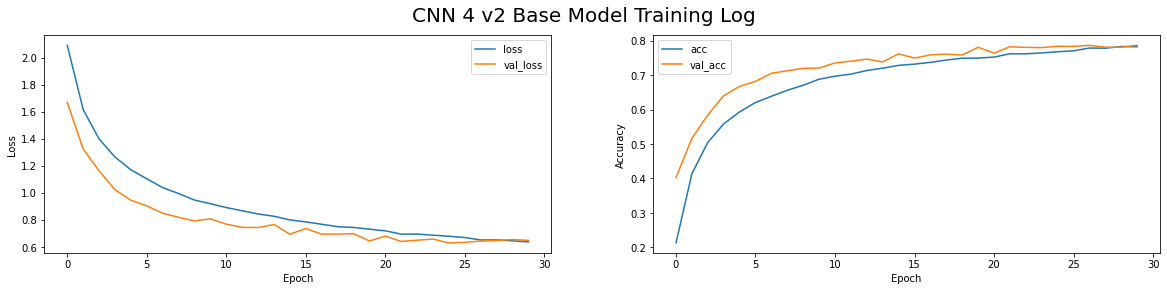

In [68]:
loss = CNN_4_v2_history.history['loss']
val_loss = CNN_4_v2_history.history['val_loss']
acc = CNN_4_v2_history.history['accuracy']
val_acc = CNN_4_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 4 v2 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

From the model training log, we can see that there is slight overfitting but the deviation from the validation loss/acc to the training loss/acc has closed up alot.

## 3.2.2.3.2 CNN 4 v3: Ascending Dropout Layer Combination - [0.3, 0.4, 0.5, 0.6]

Now, I will be trying the ascending dropout layer combination but with a much higher value as shown where the starting value is 0.3

In [69]:
CNN_4_v3=build_CNN_4(0.3, 0.4, 0.5, 0.6)
CNN_4_v3.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 8, 8, 64)        

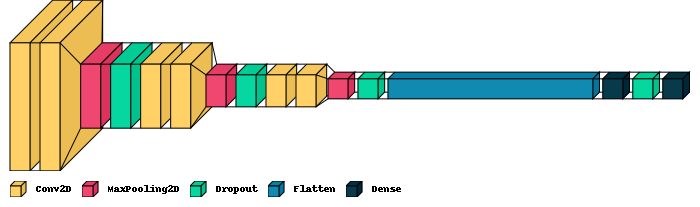

In [70]:
visualkeras.layered_view(CNN_4_v2, legend=True)

In [72]:
CNN_4_v3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_4_v3_history = CNN_4_v3.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 4s 6ms/step - loss: 2.1320 - accuracy: 0.1900 - val_loss: 1.7693 - val_accuracy: 0.3476
Epoch 2/500
625/625 [==============================] - 4s 6ms/step - loss: 1.7961 - accuracy: 0.3318 - val_loss: 1.5863 - val_accuracy: 0.4193
Epoch 3/500
625/625 [==============================] - 4s 6ms/step - loss: 1.6425 - accuracy: 0.4003 - val_loss: 1.3855 - val_accuracy: 0.5017
Epoch 4/500
625/625 [==============================] - 4s 6ms/step - loss: 1.5072 - accuracy: 0.4623 - val_loss: 1.2710 - val_accuracy: 0.5498
Epoch 5/500
625/625 [==============================] - 4s 6ms/step - loss: 1.4076 - accuracy: 0.5064 - val_loss: 1.1675 - val_accuracy: 0.5940
Epoch 6/500
625/625 [==============================] - 4s 6ms/step - loss: 1.3168 - accuracy: 0.5396 - val_loss: 1.0562 - val_accuracy: 0.6241
Epoch 7/500
625/625 [==============================] - 4s 6ms/step - loss: 1.2470 - accuracy: 0.5655 - val_loss: 1.0027 - val_accuracy: 0.6504

In [76]:
preds = CNN_4_v3.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_4_v3.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1000
           1       0.91      0.88      0.90      1000
           2       0.84      0.46      0.60      1000
           3       0.55      0.66      0.60      1000
           4       0.64      0.78      0.71      1000
           5       0.70      0.66      0.68      1000
           6       0.71      0.89      0.79      1000
           7       0.87      0.75      0.81      1000
           8       0.84      0.88      0.86      1000
           9       0.82      0.91      0.86      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000

313/313 - 1s - loss: 0.7381 - accuracy: 0.7586
Accuracy: 75.85999965667725
Macro F1-score: 0.7563097086809136


We can see that by increasing the dropout value, the model performance has decreased form 78% to 75%.

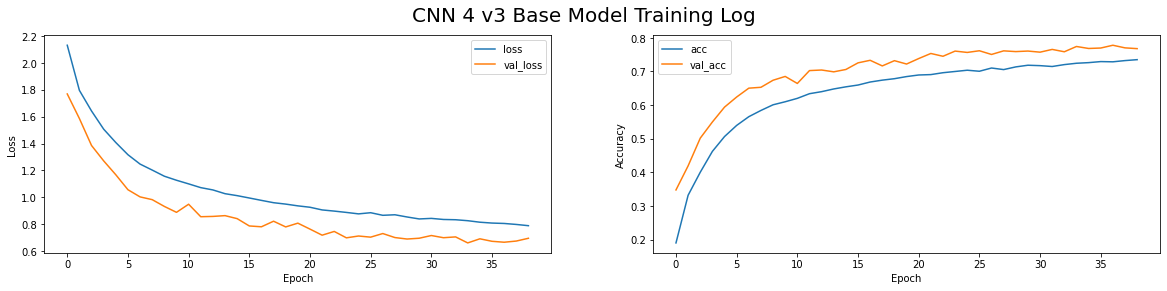

In [77]:
loss = CNN_4_v3_history.history['loss']
val_loss = CNN_4_v3_history.history['val_loss']
acc = CNN_4_v3_history.history['accuracy']
val_acc = CNN_4_v3_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 4 v3 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Also, the deviation from the validation and training loss and accuracy has increased. Hence, I will not be using this dropout layer combination

## 3.2.2.3.3 CNN 4 v4: Dropout Layer Combination - [0.2, 0.3, 0.4, 0.3]

Now, lets try reducing the values and try out the ascending then decreasing dropout. 

In [278]:
CNN_4_v4=build_CNN_4(0.2, 0.3, 0.4, 0.3)
CNN_4_v4.summary()

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_486 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_487 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_243 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_294 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_488 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_489 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_244 (MaxPoolin (None, 8, 8, 64)        

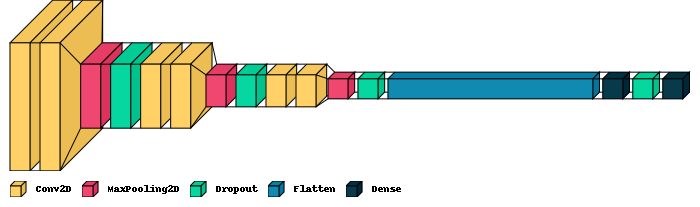

In [277]:
visualkeras.layered_view(CNN_4_v4, legend=True)

In [90]:
CNN_4_v4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_4_v4_history = CNN_4_v4.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 4s 6ms/step - loss: 1.9742 - accuracy: 0.2611 - val_loss: 1.5952 - val_accuracy: 0.4090
Epoch 2/500
625/625 [==============================] - 4s 6ms/step - loss: 1.5675 - accuracy: 0.4335 - val_loss: 1.3392 - val_accuracy: 0.5237
Epoch 3/500
625/625 [==============================] - 4s 6ms/step - loss: 1.3721 - accuracy: 0.5124 - val_loss: 1.2120 - val_accuracy: 0.5721
Epoch 4/500
625/625 [==============================] - 4s 6ms/step - loss: 1.2421 - accuracy: 0.5645 - val_loss: 1.0978 - val_accuracy: 0.6129
Epoch 5/500
625/625 [==============================] - 4s 6ms/step - loss: 1.1433 - accuracy: 0.6011 - val_loss: 0.9323 - val_accuracy: 0.6732
Epoch 6/500
625/625 [==============================] - 4s 6ms/step - loss: 1.0732 - accuracy: 0.6280 - val_loss: 0.9121 - val_accuracy: 0.6756
Epoch 7/500
625/625 [==============================] - 4s 6ms/step - loss: 1.0219 - accuracy: 0.6435 - val_loss: 0.8552 - val_accuracy: 0.6967

In [91]:
preds = CNN_4_v4.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_4_v4.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1000
           1       0.90      0.92      0.91      1000
           2       0.60      0.71      0.65      1000
           3       0.71      0.43      0.54      1000
           4       0.67      0.78      0.72      1000
           5       0.74      0.65      0.70      1000
           6       0.66      0.91      0.77      1000
           7       0.84      0.79      0.81      1000
           8       0.87      0.89      0.88      1000
           9       0.92      0.81      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.76     10000
weighted avg       0.77      0.77      0.76     10000

313/313 - 1s - loss: 0.7059 - accuracy: 0.7656
Accuracy: 76.56000256538391
Macro F1-score: 0.7626442117827071


We can see that this dropout layer value combination has increased the performance from 75% to 76%.

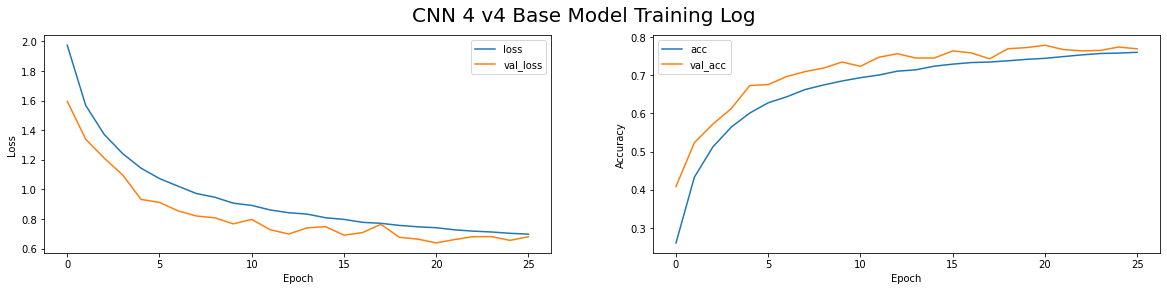

In [100]:
loss = CNN_4_v4_history.history['loss']
val_loss = CNN_4_v4_history.history['val_loss']
acc = CNN_4_v4_history.history['accuracy']
val_acc = CNN_4_v4_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 4 v4 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

From the model training log, there is still slight overfitting and the model training is not as good as the CNN v2 training log.

## 3.2.2.3.4 CNN 4 v5: Dropout Layer Combination - [0.3, 0.4, 0.5, 0.3]

Now, lets try an increased dropout layer value combination by increasing a 0.1 from CNN v4 model

In [279]:
CNN_4_v5=build_CNN_4(0.3, 0.4, 0.5, 0.3)
CNN_4_v5.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_492 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_493 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_246 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_298 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_494 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_495 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_247 (MaxPoolin (None, 8, 8, 64)        

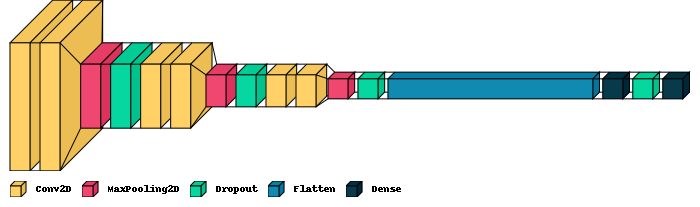

In [94]:
visualkeras.layered_view(CNN_4_v5, legend=True)

In [95]:
CNN_4_v5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_4_v5_history = CNN_4_v5.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 4s 6ms/step - loss: 1.9162 - accuracy: 0.2851 - val_loss: 1.5678 - val_accuracy: 0.4217
Epoch 2/500
625/625 [==============================] - 4s 6ms/step - loss: 1.5267 - accuracy: 0.4457 - val_loss: 1.2848 - val_accuracy: 0.5422
Epoch 3/500
625/625 [==============================] - 4s 6ms/step - loss: 1.2955 - accuracy: 0.5441 - val_loss: 1.0882 - val_accuracy: 0.6155
Epoch 4/500
625/625 [==============================] - 4s 6ms/step - loss: 1.1438 - accuracy: 0.6003 - val_loss: 0.9398 - val_accuracy: 0.6704
Epoch 5/500
625/625 [==============================] - 4s 6ms/step - loss: 1.0429 - accuracy: 0.6374 - val_loss: 0.8649 - val_accuracy: 0.6941
Epoch 6/500
625/625 [==============================] - 4s 6ms/step - loss: 0.9793 - accuracy: 0.6618 - val_loss: 0.8266 - val_accuracy: 0.7131
Epoch 7/500
625/625 [==============================] - 4s 6ms/step - loss: 0.9142 - accuracy: 0.6838 - val_loss: 0.7719 - val_accuracy: 0.7327

In [96]:
preds = CNN_4_v5.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_4_v5.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1000
           1       0.91      0.90      0.90      1000
           2       0.71      0.65      0.68      1000
           3       0.65      0.60      0.62      1000
           4       0.68      0.82      0.74      1000
           5       0.71      0.73      0.72      1000
           6       0.80      0.86      0.83      1000
           7       0.88      0.80      0.84      1000
           8       0.87      0.89      0.88      1000
           9       0.86      0.90      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

313/313 - 1s - loss: 0.6395 - accuracy: 0.7912
Accuracy: 79.11999821662903
Macro F1-score: 0.790620777578482


We can see that we have achived the highest model perfromance of 79% which is higher than the CNN 3 v2 model. 

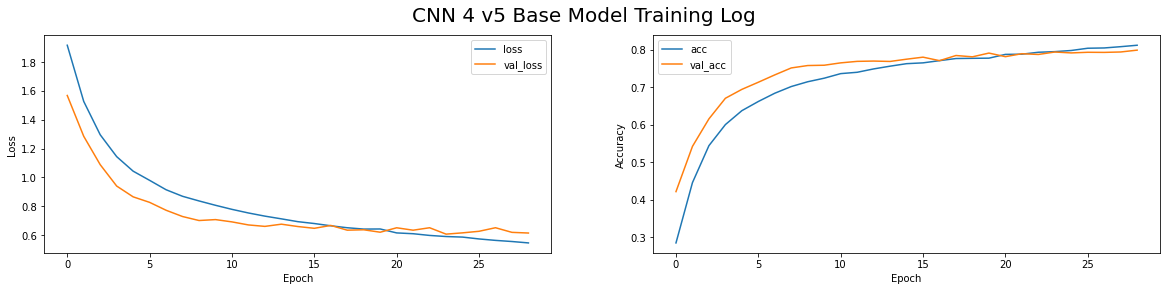

In [99]:
loss = CNN_4_v5_history.history['loss']
val_loss = CNN_4_v5_history.history['val_loss']
acc = CNN_4_v5_history.history['accuracy']
val_acc = CNN_4_v5_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 4 v5 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Looking at the CNN 4 version 5 model training log, the val loss and val accuracy are mostly aligned with the training loss and accuracy. This means that the problem of overfitting is solved! Hence, we will keep this model for the next section. Also this model has the highest model performance out of every model. 

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td><b>Fine Tuning Stage</b></td>
        <td><b>Model</b></td>
        <td><b>Accuracy</b></td>
        <td><b>Precision</b></td>
        <td><b>Recall</b></td>
        <td><b>f1-score</b></td>
        <td><b>Model Training Log</b></td>
    </thead>
    <tr>
        <td><b>Building Base Model</b></td>
        <td>CNN_1 - Base Model (Based on Project Guide)</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.65</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Conv2D Layer</b></td>
        <td>CNN_2 - CNN_1 + Added Conv2d layers</td>
        <td>0.72</td>
        <td>0.73</td>
        <td>0.72</td>
        <td>0.72</td>
        <td rowspan="5" >Underfitting</td>
    </tr>
    <tr>
        <td >CNN 3 v0: CNN 2 + Neuron Combination [16,32,64]</td>
        <td>0.71</td>
        <td>0.72</td>
        <td>0.71</td>
        <td>0.71</td>
    </tr>
    <tr>
        <td>CNN 3 v1: CNN 2 + Neuron Combination [32,64,128]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v2: CNN 2 + Neuron Combination [64,128,256]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v3: CNN 2 + Neuron Combination [126, 256, 512]</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Dropout Layer</b></td>
        <td>CNN 4 v1 - CNN 3 v1 + Added Dropout layers</td>
        <td>0.68</td>
        <td>0.72</td>
        <td>0.68</td>
        <td>0.68</td>
        <td>Some Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v2: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.5]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>Slight Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v3: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5,0.6]</td>
        <td>0.76</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v4: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.3]</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td style="background-color:#48AAAD;color:white;">CNN 4 v5: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5, 0.3]</td>
        <td style="background-color:#48AAAD;color:white;">0.79</td>
        <td style="background-color:#48AAAD;color:white;">0.79</td>
        <td style="background-color:#48AAAD;color:white;">0.79</td>
        <td style="background-color:#48AAAD;color:white;">0.79</td>
        <td style="background-color:#48AAAD;color:white;">No Overfitting</td>
    </tr>
    
    
</table>

<img src="light-bulb.png" align='left' height="50" width="70"><h2>Conclusion: CNN 4 v5 F1-Score is 79%</h2>

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.2.3 Tuning Batch Normalization layer</h2><br>

## 3.2.3.1 Adding Batch Normalization layer

Now, I will be adding Batch normalization layers.It does this scaling the output of the layer, specifically by standardizing the activations of each input variable per mini-batch, such as the activations of a node from the previous layer. It works just the same way as we normalize the input data where we divided the x_train/255.

What we are trying to do there is we are arranging all the features in same scale so that model converges easily and we can reduce the distrotions.Whenever we passs the CNN throuh a batch normalization layer we are normalizing the weights so that our model will be stable and we can train model longer and also use larger learning rate.

I will be adding it after every conv2d layer and the dense layer of 64


In [280]:
CNN_5_v1=Sequential()
CNN_5_v1.add(Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(32,32,1)))
CNN_5_v1.add(BatchNormalization())
CNN_5_v1.add(Conv2D(32,(3,3),activation="relu", padding='same'))
CNN_5_v1.add(BatchNormalization())
CNN_5_v1.add(MaxPooling2D(2,2))
CNN_5_v1.add(Dropout(0.3))

CNN_5_v1.add(Conv2D(64,(3,3),activation="relu", padding='same'))
CNN_5_v1.add(BatchNormalization())
CNN_5_v1.add(Conv2D(64,(3,3),activation="relu", padding='same'))
CNN_5_v1.add(BatchNormalization())
CNN_5_v1.add(MaxPooling2D(2,2))
CNN_5_v1.add(Dropout(0.4))


CNN_5_v1.add(Conv2D(128,(3,3),activation="relu", padding='same'))
CNN_5_v1.add(BatchNormalization())
CNN_5_v1.add(Conv2D(128,(3,3),activation="relu", padding='same'))
CNN_5_v1.add(BatchNormalization())
CNN_5_v1.add(MaxPooling2D(2,2))
CNN_5_v1.add(Dropout(0.5))

CNN_5_v1.add(Flatten())
CNN_5_v1.add(Dense(64,activation='relu'))
CNN_5_v1.add(BatchNormalization())
CNN_5_v1.add(Dropout(0.3))
CNN_5_v1.add(Dense(10,activation='softmax'))
CNN_5_v1.summary()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_498 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_389 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_499 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_390 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_249 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_302 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_500 (Conv2D)          (None, 16, 16, 64)      

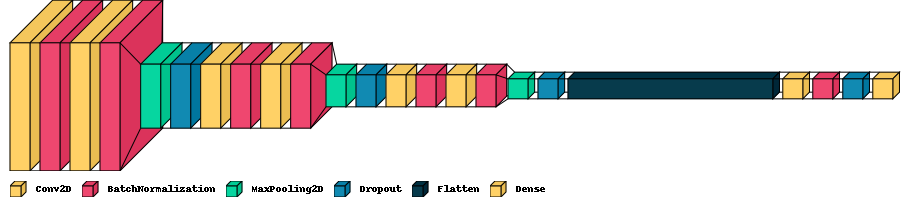

In [281]:
visualkeras.layered_view(CNN_5_v1, legend=True)

In [282]:
CNN_5_v1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_5_v1_history = CNN_5_v1.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 8s 11ms/step - loss: 1.7221 - accuracy: 0.4027 - val_loss: 1.7279 - val_accuracy: 0.3832
Epoch 2/500
625/625 [==============================] - 6s 9ms/step - loss: 1.1951 - accuracy: 0.5786 - val_loss: 1.3308 - val_accuracy: 0.5575
Epoch 3/500
625/625 [==============================] - 7s 11ms/step - loss: 1.0093 - accuracy: 0.6486 - val_loss: 0.9651 - val_accuracy: 0.6692
Epoch 4/500
625/625 [==============================] - 7s 11ms/step - loss: 0.9048 - accuracy: 0.6852 - val_loss: 0.7615 - val_accuracy: 0.7335
Epoch 5/500
625/625 [==============================] - 7s 11ms/step - loss: 0.8373 - accuracy: 0.7102 - val_loss: 0.7078 - val_accuracy: 0.7562
Epoch 6/500
625/625 [==============================] - 7s 11ms/step - loss: 0.7799 - accuracy: 0.7316 - val_loss: 0.7681 - val_accuracy: 0.7362
Epoch 7/500
625/625 [==============================] - 7s 11ms/step - loss: 0.7397 - accuracy: 0.7447 - val_loss: 0.6965 - val_accuracy: 

In [283]:
preds = CNN_5_v1.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_5_v1.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1000
           1       0.94      0.90      0.92      1000
           2       0.81      0.67      0.74      1000
           3       0.69      0.63      0.66      1000
           4       0.69      0.85      0.76      1000
           5       0.81      0.66      0.73      1000
           6       0.81      0.88      0.84      1000
           7       0.84      0.89      0.86      1000
           8       0.73      0.96      0.83      1000
           9       0.85      0.91      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

313/313 - 1s - loss: 0.6444 - accuracy: 0.7983
Accuracy: 79.830002784729
Macro F1-score: 0.7952089568619523


Looks like model perfromance has increased by 0.01% by adding batch normalization

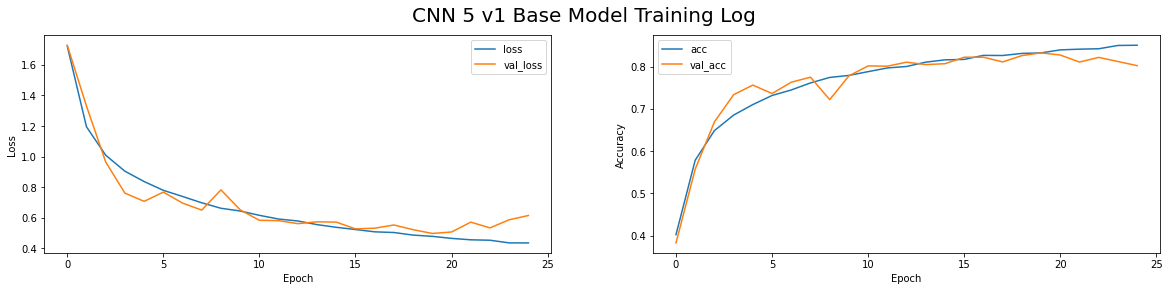

In [284]:
loss = CNN_5_v1_history.history['loss']
val_loss = CNN_5_v1_history.history['val_loss']
acc = CNN_5_v1_history.history['accuracy']
val_acc = CNN_5_v1_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 5 v1 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Looking at the CNN 5 version 1 model training log, even though batch normzalization layers has allowed the model to converge faster, however,<b> underfitting has increased by quite abit but not too much as compared to the previous training log with only dropout layers and no batch normalization layers.</b> Hence given that the model perfromance has only increase by 0.01% with the slight overfitting,<b> I would be keeping this model with batch normalization as I can continue reducing the overfitting in the later stage.</b>

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td><b>Fine Tuning Stage</b></td>
        <td><b>Model</b></td>
        <td><b>Accuracy</b></td>
        <td><b>Precision</b></td>
        <td><b>Recall</b></td>
        <td><b>f1-score</b></td>
        <td><b>Model Training Log</b></td>
    </thead>
    <tr>
        <td><b>Building Base Model</b></td>
        <td>CNN_1 - Base Model (Based on Project Guide)</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.65</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Conv2D Layer</b></td>
        <td>CNN_2 - CNN_1 + Added Conv2d layers</td>
        <td>0.72</td>
        <td>0.73</td>
        <td>0.72</td>
        <td>0.72</td>
        <td rowspan="5" >Underfitting</td>
    </tr>
    <tr>
        <td >CNN 3 v0: CNN 2 + Neuron Combination [16,32,64]</td>
        <td>0.71</td>
        <td>0.72</td>
        <td>0.71</td>
        <td>0.71</td>
    </tr>
    <tr>
        <td>CNN 3 v1: CNN 2 + Neuron Combination [32,64,128]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v2: CNN 2 + Neuron Combination [64,128,256]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v3: CNN 2 + Neuron Combination [126, 256, 512]</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Dropout Layer</b></td>
        <td>CNN 4 v1 - CNN 3 v1 + Added Dropout layers</td>
        <td>0.68</td>
        <td>0.72</td>
        <td>0.68</td>
        <td>0.68</td>
        <td>Some Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v2: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.5]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>Slight Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v3: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5,0.6]</td>
        <td>0.76</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v4: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.3]</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v5: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5, 0.3]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>No Overfitting</td>
    </tr>
    <tr>
        <td><b>Tuning Batch Normalization Layer</b></td>
        <td style="background-color:#48AAAD;color:white;">CNN 5 v1: CNN 4 v5 + Added Batch Normalization layer</td>
        <td style="background-color:#48AAAD;color:white;">0.80</td>
        <td style="background-color:#48AAAD;color:white;">0.81</td>
        <td style="background-color:#48AAAD;color:white;">0.80</td>
        <td style="background-color:#48AAAD;color:white;">0.80</td>
        <td style="background-color:#48AAAD;color:white;">Slight Underfitting</td>
    </tr>
    
</table>

<img src="light-bulb.png" align='left' height="50" width="70"><h2>Conclusion: CNN 5 v1 F1-Score is 80%</h2>

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.2.4 Tuning Dense layer</h2><br>

Now I will be tuning the number of neurons in Dense layer. 

## 3.2.4.1 Tuning number of neurons in Dense layer

In [286]:
def build_CNN_6(d1):
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))

    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.4))


    model.add(Conv2D(128,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(d1,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(10,activation='softmax'))
    return model 

Note that I will be trying out values - 32, 64, 128, 256, 512

## 3.2.4.1.1 CNN 6 v1: Dense layer Value - 32

In [287]:
CNN_6_v1=build_CNN_6(32)
CNN_6_v1.summary()

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_504 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_396 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_505 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_397 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_252 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_306 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_506 (Conv2D)          (None, 16, 16, 64)      

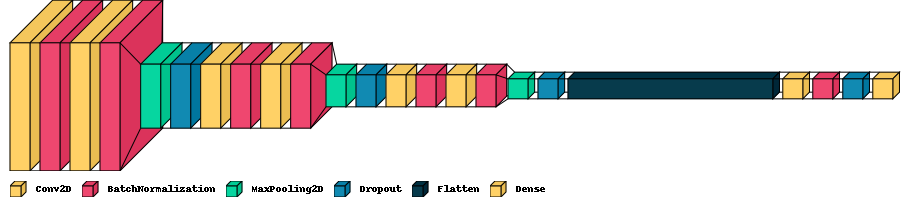

In [288]:
visualkeras.layered_view(CNN_6_v1, legend=True)

In [289]:
CNN_6_v1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_6_v1_history = CNN_6_v1.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 1.6969 - accuracy: 0.3950 - val_loss: 1.4024 - val_accuracy: 0.4663
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.2126 - accuracy: 0.5751 - val_loss: 0.9787 - val_accuracy: 0.6592
Epoch 3/500
625/625 [==============================] - 5s 9ms/step - loss: 1.0322 - accuracy: 0.6432 - val_loss: 0.8728 - val_accuracy: 0.6981
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9319 - accuracy: 0.6784 - val_loss: 0.7750 - val_accuracy: 0.7297
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8642 - accuracy: 0.7042 - val_loss: 0.7721 - val_accuracy: 0.7291
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8085 - accuracy: 0.7224 - val_loss: 0.7384 - val_accuracy: 0.7472
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7637 - accuracy: 0.7397 - val_loss: 0.6884 - val_accuracy: 0.7614

In [292]:
preds = CNN_6_v1.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_6_v1.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1000
           1       0.94      0.90      0.92      1000
           2       0.79      0.65      0.71      1000
           3       0.61      0.68      0.64      1000
           4       0.78      0.72      0.75      1000
           5       0.58      0.84      0.69      1000
           6       0.86      0.81      0.83      1000
           7       0.90      0.81      0.85      1000
           8       0.89      0.89      0.89      1000
           9       0.90      0.89      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

313/313 - 1s - loss: 0.6160 - accuracy: 0.7965
Accuracy: 79.6500027179718
Macro F1-score: 0.7994981397584691


By tuning the dense layer value, it makes not much difference to the model performance as the f1-score is still stagnant 80%

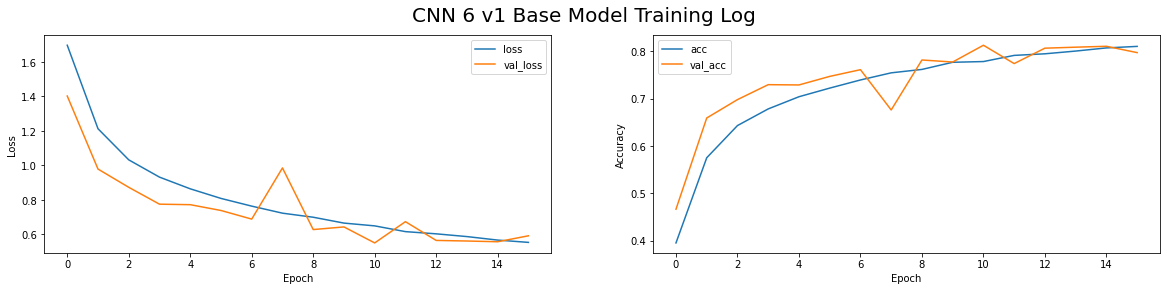

In [293]:
loss = CNN_6_v1_history.history['loss']
val_loss = CNN_6_v1_history.history['val_loss']
acc = CNN_6_v1_history.history['accuracy']
val_acc = CNN_6_v1_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 6 v1 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can see that the model performance has remained at 80% and the model trainign has gotten worse from the previous CNN 5 v1 where there is major fluctuations in deviation from the training and validation loss and accuracy. Hence, in the next stage, I will be increasing the dense layer value to 64.

## 3.2.4.1.2 Dense layer Value - 64

In [294]:
CNN_6_v2=build_CNN_6(64)
CNN_6_v2.summary()

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_510 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_403 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_511 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_404 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_255 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_310 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_512 (Conv2D)          (None, 16, 16, 64)      

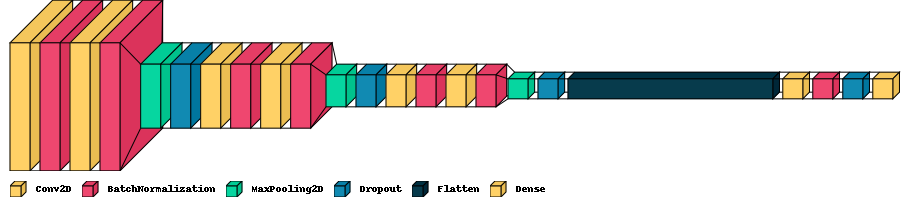

In [295]:
visualkeras.layered_view(CNN_6_v2, legend=True)

In [296]:
CNN_6_v2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_6_v2_history = CNN_6_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 1.7911 - accuracy: 0.3793 - val_loss: 1.9215 - val_accuracy: 0.3472
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.2256 - accuracy: 0.5689 - val_loss: 1.4650 - val_accuracy: 0.5137
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 1.0261 - accuracy: 0.6428 - val_loss: 0.9228 - val_accuracy: 0.6795
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9278 - accuracy: 0.6787 - val_loss: 0.8442 - val_accuracy: 0.7056
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8531 - accuracy: 0.7041 - val_loss: 0.8363 - val_accuracy: 0.7053
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8012 - accuracy: 0.7239 - val_loss: 0.7108 - val_accuracy: 0.7530
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7552 - accuracy: 0.7403 - val_loss: 0.6988 - val_accuracy: 0.7546

In [297]:
preds = CNN_6_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_6_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.93      0.55      0.69      1000
           1       0.95      0.84      0.90      1000
           2       0.73      0.63      0.67      1000
           3       0.69      0.60      0.64      1000
           4       0.52      0.91      0.66      1000
           5       0.76      0.62      0.69      1000
           6       0.81      0.85      0.83      1000
           7       0.89      0.78      0.83      1000
           8       0.89      0.87      0.88      1000
           9       0.72      0.96      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.79      0.76      0.76     10000
weighted avg       0.79      0.76      0.76     10000

313/313 - 1s - loss: 0.7383 - accuracy: 0.7618
Accuracy: 76.17999911308289
Macro F1-score: 0.7622597094878987


We can see that by increasing the dense layer value to 64, the model performance has decreased instead. Hence, I will be ommitting this dense layer value.

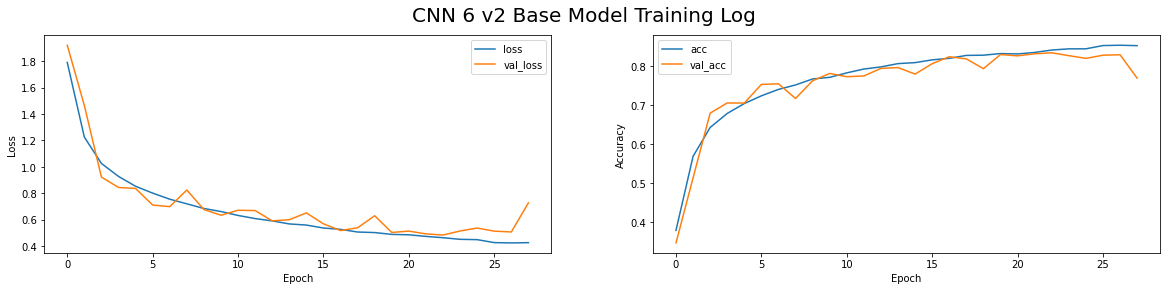

In [298]:
loss = CNN_6_v2_history.history['loss']
val_loss = CNN_6_v2_history.history['val_loss']
acc = CNN_6_v2_history.history['accuracy']
val_acc = CNN_6_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 6 v2 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Evem though the model performance has decreased, the model training is better than the previous model. However, we can see that at the end of the epoch there is a tendency of underfitting. Hence, let increasr the dense layer value

## 3.2.4.1.3 Dense layer Value - 128

In [299]:
CNN_6_v3=build_CNN_6(128)
CNN_6_v3.summary()

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_516 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_410 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_517 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_411 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_258 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_314 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_518 (Conv2D)          (None, 16, 16, 64)      

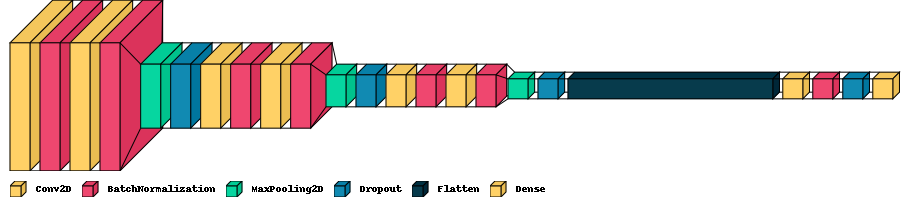

In [300]:
visualkeras.layered_view(CNN_6_v3, legend=True)

In [301]:
CNN_6_v3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_6_v3_history = CNN_6_v3.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 1.7640 - accuracy: 0.3952 - val_loss: 1.5410 - val_accuracy: 0.4498
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1800 - accuracy: 0.5823 - val_loss: 1.1390 - val_accuracy: 0.6044
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9952 - accuracy: 0.6493 - val_loss: 0.8697 - val_accuracy: 0.6959
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8974 - accuracy: 0.6848 - val_loss: 0.8881 - val_accuracy: 0.6904
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8347 - accuracy: 0.7080 - val_loss: 0.7187 - val_accuracy: 0.7500
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7711 - accuracy: 0.7323 - val_loss: 0.6867 - val_accuracy: 0.7619
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7311 - accuracy: 0.7470 - val_loss: 0.8020 - val_accuracy: 0.7178

In [302]:
preds = CNN_6_v3.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_6_v3.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.92      0.93      0.92      1000
           2       0.80      0.73      0.76      1000
           3       0.76      0.65      0.70      1000
           4       0.72      0.87      0.79      1000
           5       0.78      0.75      0.76      1000
           6       0.77      0.92      0.84      1000
           7       0.89      0.86      0.88      1000
           8       0.92      0.88      0.90      1000
           9       0.92      0.89      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

313/313 - 1s - loss: 0.5340 - accuracy: 0.8313
Accuracy: 83.13000202178955
Macro F1-score: 0.8305555884405095


By increasing the dense layer value to 83%m we can see that there is a huge increase  in accuracy and f1 score 83%

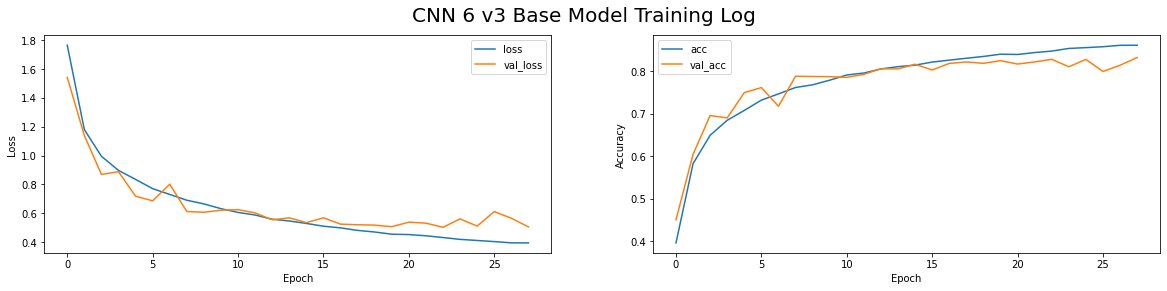

In [303]:
loss = CNN_6_v3_history.history['loss']
val_loss = CNN_6_v3_history.history['val_loss']
acc = CNN_6_v3_history.history['accuracy']
val_acc = CNN_6_v3_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 6 v3 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

From the model training log, we can see that the model training has slight underfitting. However, it is better than the previous model as the deviation from the validation and training loss and accuracy is very less. Hence, I will be keeping this model and tryin out a higher dense layer value

## 3.2.4.1.3 Dense layer Value - 256

In [304]:
CNN_6_v4=build_CNN_6(256)
CNN_6_v4.summary()

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_522 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_417 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_523 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_418 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_261 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_318 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_524 (Conv2D)          (None, 16, 16, 64)      

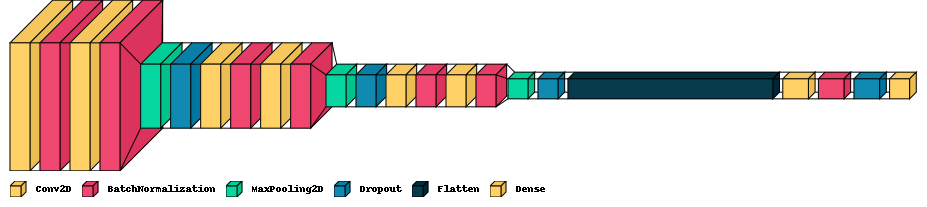

In [305]:
visualkeras.layered_view(CNN_6_v4, legend=True)

In [306]:
CNN_6_v4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_6_v4_history = CNN_6_v4.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 1.7290 - accuracy: 0.4094 - val_loss: 1.7631 - val_accuracy: 0.3955
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1596 - accuracy: 0.5915 - val_loss: 1.1528 - val_accuracy: 0.5970
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9825 - accuracy: 0.6552 - val_loss: 0.9324 - val_accuracy: 0.6790
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8827 - accuracy: 0.6908 - val_loss: 0.8680 - val_accuracy: 0.6987
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8227 - accuracy: 0.7135 - val_loss: 0.9776 - val_accuracy: 0.6661
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7715 - accuracy: 0.7288 - val_loss: 0.6664 - val_accuracy: 0.7682
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7210 - accuracy: 0.7478 - val_loss: 0.6762 - val_accuracy: 0.7690

In [307]:
preds = CNN_6_v4.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_6_v4.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1000
           1       0.95      0.89      0.92      1000
           2       0.83      0.71      0.76      1000
           3       0.67      0.71      0.69      1000
           4       0.76      0.85      0.80      1000
           5       0.73      0.80      0.76      1000
           6       0.84      0.91      0.87      1000
           7       0.93      0.83      0.87      1000
           8       0.93      0.88      0.91      1000
           9       0.81      0.95      0.87      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

313/313 - 1s - loss: 0.5532 - accuracy: 0.8282
Accuracy: 82.81999826431274
Macro F1-score: 0.8287833937717825


We can see that by increasing the dense layer value to 256 the model perfromance has decreased slightly.

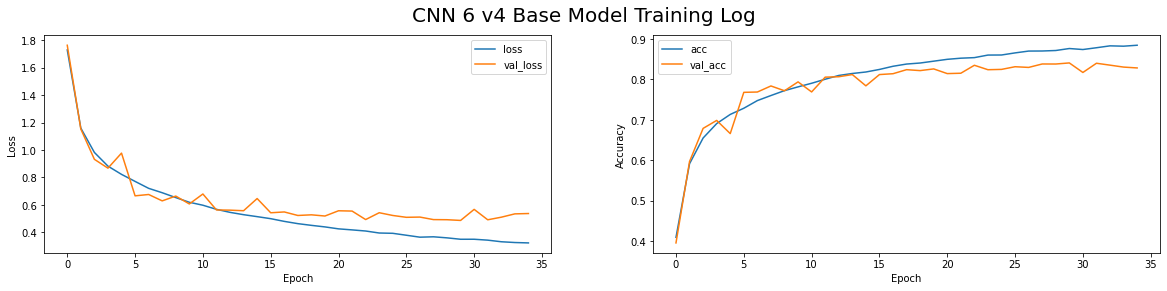

In [308]:
loss = CNN_6_v4_history.history['loss']
val_loss = CNN_6_v4_history.history['val_loss']
acc = CNN_6_v4_history.history['accuracy']
val_acc = CNN_6_v4_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 6 v4 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

However, having a higher dense layer value has resulted in a higher deviation from the training and validation loss/acc as compared to the previous model

## 3.2.4.1.4 Dense layer Value - 512

In [309]:
CNN_6_v5=build_CNN_6(512)
CNN_6_v5.summary()

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_528 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_424 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_529 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_425 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_264 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_322 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_530 (Conv2D)          (None, 16, 16, 64)      

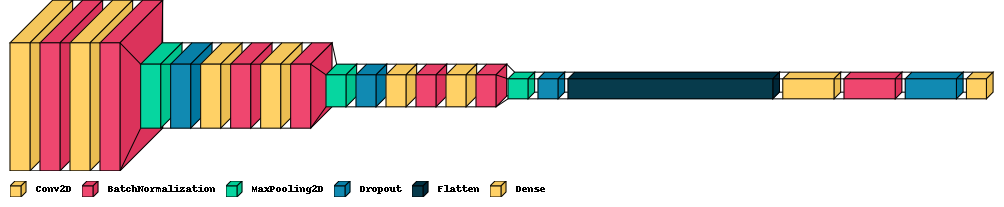

In [310]:
visualkeras.layered_view(CNN_6_v5, legend=True)

In [311]:
CNN_6_v5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_6_v5_history = CNN_6_v5.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 1.8113 - accuracy: 0.3970 - val_loss: 2.1160 - val_accuracy: 0.3196
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1893 - accuracy: 0.5842 - val_loss: 1.1796 - val_accuracy: 0.5982
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9837 - accuracy: 0.6561 - val_loss: 1.0892 - val_accuracy: 0.6239
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8823 - accuracy: 0.6899 - val_loss: 0.8136 - val_accuracy: 0.7159
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8139 - accuracy: 0.7144 - val_loss: 0.7222 - val_accuracy: 0.7537
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7623 - accuracy: 0.7337 - val_loss: 0.7885 - val_accuracy: 0.7318
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7137 - accuracy: 0.7506 - val_loss: 0.7397 - val_accuracy: 0.7419

In [312]:
preds = CNN_6_v5.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_6_v5.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       0.95      0.91      0.93      1000
           2       0.82      0.71      0.76      1000
           3       0.68      0.72      0.70      1000
           4       0.76      0.85      0.81      1000
           5       0.82      0.71      0.76      1000
           6       0.83      0.88      0.86      1000
           7       0.89      0.87      0.88      1000
           8       0.86      0.94      0.90      1000
           9       0.89      0.92      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

313/313 - 1s - loss: 0.5087 - accuracy: 0.8363
Accuracy: 83.63000154495239
Macro F1-score: 0.8357599331433068


We can see that having a dense layer value of 512, has resulted in the highest model performance of 84% for f1 score.

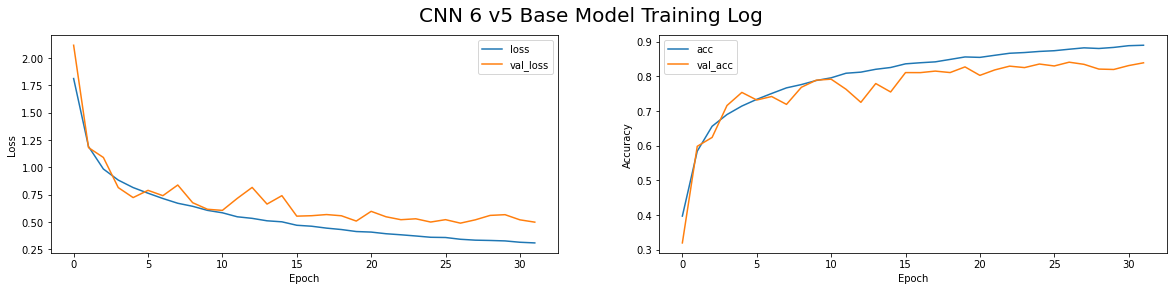

In [313]:
loss = CNN_6_v5_history.history['loss']
val_loss = CNN_6_v5_history.history['val_loss']
acc = CNN_6_v5_history.history['accuracy']
val_acc = CNN_6_v5_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 6 v5 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

However, having a higher dense layer value has resulted in a higher deviation from the training and validation loss/acc as compared to the CNN 6 v5

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td><b>Fine Tuning Stage</b></td>
        <td><b>Model</b></td>
        <td><b>Accuracy</b></td>
        <td><b>Precision</b></td>
        <td><b>Recall</b></td>
        <td><b>f1-score</b></td>
        <td><b>Model Training Log</b></td>
    </thead>
    <tr>
        <td><b>Building Base Model</b></td>
        <td>CNN_1 - Base Model (Based on Project Guide)</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.65</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Conv2D Layer</b></td>
        <td>CNN_2 - CNN_1 + Added Conv2d layers</td>
        <td>0.72</td>
        <td>0.73</td>
        <td>0.72</td>
        <td>0.72</td>
        <td rowspan="5" >Underfitting</td>
    </tr>
    <tr>
        <td >CNN 3 v0: CNN 2 + Neuron Combination [16,32,64]</td>
        <td>0.71</td>
        <td>0.72</td>
        <td>0.71</td>
        <td>0.71</td>
    </tr>
    <tr>
        <td>CNN 3 v1: CNN 2 + Neuron Combination [32,64,128]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v2: CNN 2 + Neuron Combination [64,128,256]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v3: CNN 2 + Neuron Combination [126, 256, 512]</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Dropout Layer</b></td>
        <td>CNN 4 v1 - CNN 3 v1 + Added Dropout layers</td>
        <td>0.68</td>
        <td>0.72</td>
        <td>0.68</td>
        <td>0.68</td>
        <td>Some Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v2: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.5]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>Slight Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v3: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5,0.6]</td>
        <td>0.76</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v4: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.3]</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v5: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5, 0.3]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>No Overfitting</td>
    </tr>
    <tr>
        <td><b>Tuning Batch Normalization Layer</b></td>
        <td>CNN 5 v1: CNN 4 v5 + Added Batch Normalization layer</td>
        <td>0.80</td>
        <td>0.81</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>>Slight Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Dense Layer</b></td>
        <td>CNN 6 v1 - CNN 5 v1 + Dense Layer Value [32]</td>
        <td>0.80</td>
        <td>0.81</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>Some fluctuations</td>
    </tr>
    <tr>
        <td>CNN 6 v2 - CNN 5 v1 + Dense Layer Value [64]</td>
        <td>0.76</td>
        <td>0.79</td>
        <td>0.76</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td style="background-color:#48AAAD;color:white;">CNN 6 v3 - CNN 5 v1 + Dense Layer Value [128]</td>
        <td style="background-color:#48AAAD;color:white;">0.83</td>
        <td style="background-color:#48AAAD;color:white;">0.83</td>
        <td style="background-color:#48AAAD;color:white;">0.83</td>
        <td style="background-color:#48AAAD;color:white;">0.83</td>
        <td style="background-color:#48AAAD;color:white;">Very slight underfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v4 - CNN 5 v1 + Dense Layer Value [256]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v5 - CNN 5 v1 + Dense Layer Value [512]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.84</td>
        <td>0.83</td>
        <td>Underfitting</td>
    </tr>
    
</table>

<img src="light-bulb.png" align='left' height="50" width="70"><h2>Conclusion: CNN 6 v3 F1-Score is 83%</h2>

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.2.5 Tuning Activation Function</h2><br>

For activation function, I will be tuning in a way where by I have created a function with 2 parameters, the first one is activation function for all Conv2d layers while the second acivtation function for second last Dense layer 

## 3.2.5.1 Tuning Activation Function

In [24]:
def build_CNN_7(f1,f2):
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation=f1, padding='same',input_shape=(32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(3,3),activation=f1, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))

    model.add(Conv2D(64,(3,3),activation=f1, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3),activation=f1, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.4))


    model.add(Conv2D(128,(3,3),activation=f1, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3),activation=f1, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128,activation=f2))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(10,activation='softmax'))
    return model 

## 3.2.5.1.1 Relu for Conv2d , Relu for Dense

In [26]:
CNN_7_v1=build_CNN_7('relu','relu')
CNN_7_v1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

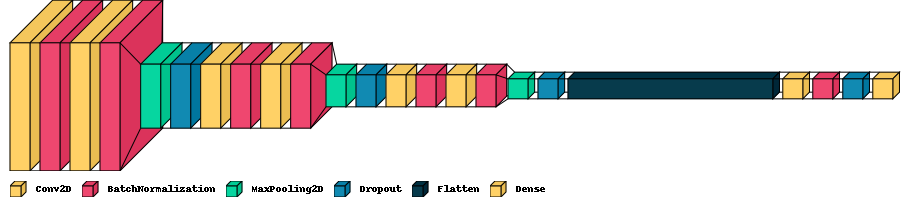

In [27]:
visualkeras.layered_view(CNN_7_v1, legend=True)

In [28]:
CNN_7_v1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_7_v1_history = CNN_7_v1.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 1.7623 - accuracy: 0.3968 - val_loss: 1.8305 - val_accuracy: 0.3748
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1960 - accuracy: 0.5756 - val_loss: 1.2228 - val_accuracy: 0.5792
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 1.0028 - accuracy: 0.6492 - val_loss: 0.9488 - val_accuracy: 0.6654
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9035 - accuracy: 0.6861 - val_loss: 0.8404 - val_accuracy: 0.7066
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8256 - accuracy: 0.7119 - val_loss: 0.7568 - val_accuracy: 0.7403
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7759 - accuracy: 0.7321 - val_loss: 0.7217 - val_accuracy: 0.7517
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7329 - accuracy: 0.7458 - val_loss: 0.6337 - val_accuracy: 0.7829

In [29]:
preds = CNN_7_v1.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_7_v1.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1000
           1       0.94      0.90      0.92      1000
           2       0.80      0.69      0.74      1000
           3       0.73      0.60      0.66      1000
           4       0.76      0.83      0.79      1000
           5       0.74      0.77      0.75      1000
           6       0.74      0.92      0.82      1000
           7       0.91      0.85      0.88      1000
           8       0.84      0.94      0.89      1000
           9       0.85      0.94      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

313/313 - 1s - loss: 0.5608 - accuracy: 0.8188
Accuracy: 81.87999725341797
Macro F1-score: 0.8166377155527705


We can see that accuracy is decent at 81% when both dense andc conv2d layer activation function is relu

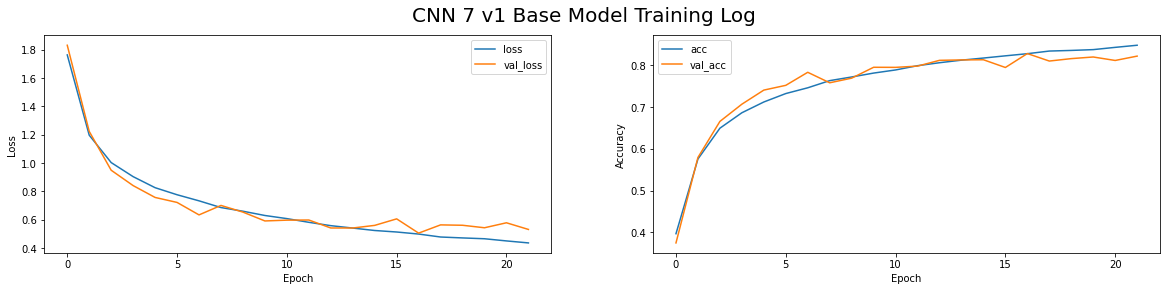

In [30]:
loss = CNN_7_v1_history.history['loss']
val_loss = CNN_7_v1_history.history['val_loss']
acc = CNN_7_v1_history.history['accuracy']
val_acc = CNN_7_v1_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 7 v1 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can also see that the model training log is good as there is no underfitting and overfitting observed

## 3.2.5.1.2 Tanh for Conv2d , Tanh for Dense

In [32]:
CNN_7_v2=build_CNN_7('tanh','tanh')
CNN_7_v2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)       

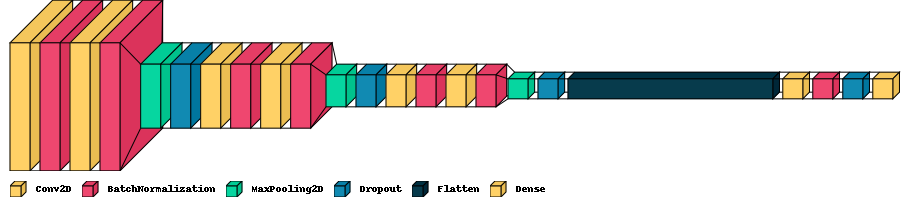

In [33]:
visualkeras.layered_view(CNN_7_v2, legend=True)

In [34]:
CNN_7_v2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_7_v2_history = CNN_7_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 8ms/step - loss: 1.9765 - accuracy: 0.3030 - val_loss: 2.4714 - val_accuracy: 0.2601
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.5315 - accuracy: 0.4464 - val_loss: 1.4323 - val_accuracy: 0.4954
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 1.3612 - accuracy: 0.5214 - val_loss: 1.2568 - val_accuracy: 0.5657
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 1.2828 - accuracy: 0.5482 - val_loss: 1.2221 - val_accuracy: 0.5703
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 1.2184 - accuracy: 0.5764 - val_loss: 1.1085 - val_accuracy: 0.6078
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1786 - accuracy: 0.5885 - val_loss: 1.2480 - val_accuracy: 0.5625
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1504 - accuracy: 0.6008 - val_loss: 1.2154 - val_accuracy: 0.5837

In [37]:
preds = CNN_7_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_7_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1000
           1       0.79      0.82      0.80      1000
           2       0.60      0.46      0.52      1000
           3       0.59      0.35      0.44      1000
           4       0.62      0.59      0.60      1000
           5       0.64      0.52      0.57      1000
           6       0.68      0.80      0.73      1000
           7       0.61      0.78      0.68      1000
           8       0.76      0.79      0.77      1000
           9       0.65      0.91      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000

313/313 - 1s - loss: 0.9790 - accuracy: 0.6689
Accuracy: 66.89000129699707
Macro F1-score: 0.6586422145661863


When both Conv2d and dense activation is set as 'tanh', we can see that the model performance decreased alot to 65%. Hence, We will not be using this activation function combination 

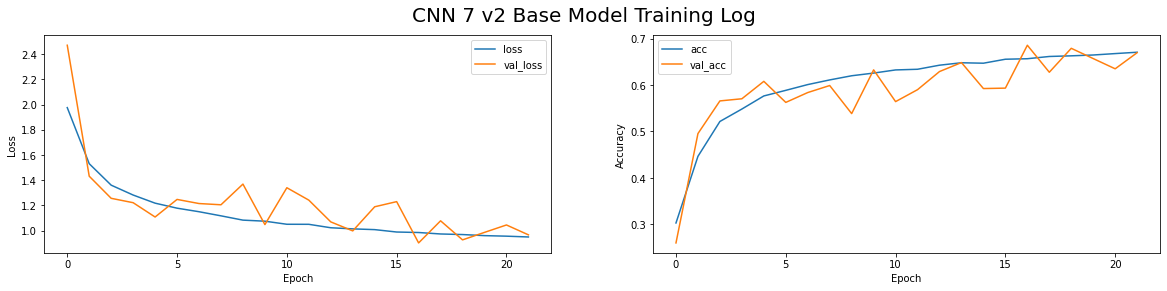

In [39]:
loss = CNN_7_v2_history.history['loss']
val_loss = CNN_7_v2_history.history['val_loss']
acc = CNN_7_v2_history.history['accuracy']
val_acc = CNN_7_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 7 v2 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

For model training log, we can see that there is are major fluctuations between test and train acc/loss coupled with a high loss, and low accuracy

## 3.2.5.1.3 Sigmoid for Conv2d , Sigmoid for Dense

In [40]:
CNN_7_v3=build_CNN_7('sigmoid','sigmoid')
CNN_7_v3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)       

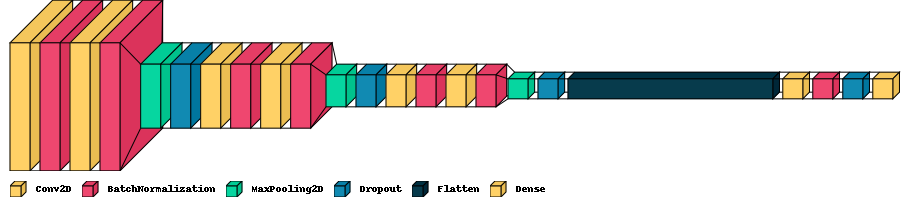

In [41]:
visualkeras.layered_view(CNN_7_v3, legend=True)

In [42]:
CNN_7_v3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_7_v3_history = CNN_7_v3.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 8ms/step - loss: 1.8309 - accuracy: 0.3619 - val_loss: 1.8156 - val_accuracy: 0.4047
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.3094 - accuracy: 0.5401 - val_loss: 1.0830 - val_accuracy: 0.6149
Epoch 3/500
625/625 [==============================] - 5s 7ms/step - loss: 1.1507 - accuracy: 0.5988 - val_loss: 1.3705 - val_accuracy: 0.5243
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 1.0678 - accuracy: 0.6292 - val_loss: 1.1446 - val_accuracy: 0.6048
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 1.0027 - accuracy: 0.6532 - val_loss: 1.0672 - val_accuracy: 0.6360
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9506 - accuracy: 0.6715 - val_loss: 0.9627 - val_accuracy: 0.6767
Epoch 7/500
625/625 [==============================] - 5s 9ms/step - loss: 0.9123 - accuracy: 0.6841 - val_loss: 1.0899 - val_accuracy: 0.6280

In [43]:
preds = CNN_7_v3.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_7_v3.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.86      0.66      0.74      1000
           1       0.92      0.80      0.86      1000
           2       0.76      0.52      0.62      1000
           3       0.58      0.56      0.57      1000
           4       0.61      0.84      0.71      1000
           5       0.79      0.51      0.62      1000
           6       0.86      0.75      0.80      1000
           7       0.77      0.82      0.80      1000
           8       0.72      0.92      0.80      1000
           9       0.64      0.95      0.76      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.73      0.73     10000

313/313 - 1s - loss: 0.8193 - accuracy: 0.7321
Accuracy: 73.21000099182129
Macro F1-score: 0.7278821093685516


When both Conv2d and dense activation is set as 'sigmoid', we can see that the model performance decreased alot to 73%. Hence, We will not be using this activation function combination 

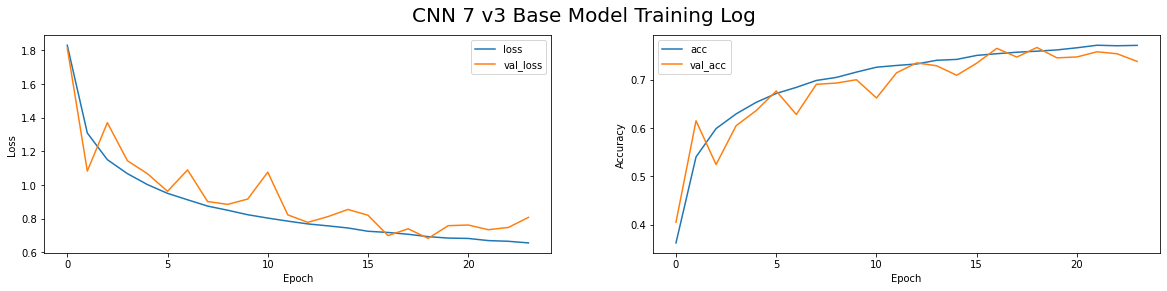

In [44]:
loss = CNN_7_v3_history.history['loss']
val_loss = CNN_7_v3_history.history['val_loss']
acc = CNN_7_v3_history.history['accuracy']
val_acc = CNN_7_v3_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 7 v3 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

For model training log, we can see that there is are major fluctuations between test and train acc/loss coupled with a high loss, and low accuracy

## 3.2.5.1.4 Relu for Conv2d , Tanh for Dense

In [45]:
CNN_7_v4=build_CNN_7('relu','tanh')
CNN_7_v4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_35 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)       

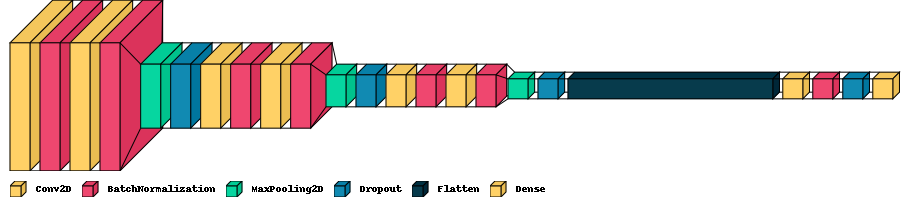

In [46]:
visualkeras.layered_view(CNN_7_v4, legend=True)

In [48]:
CNN_7_v4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_7_v4_history = CNN_7_v4.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 8ms/step - loss: 1.3655 - accuracy: 0.5168 - val_loss: 1.3036 - val_accuracy: 0.5483
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1321 - accuracy: 0.6037 - val_loss: 1.0564 - val_accuracy: 0.6322
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 1.0251 - accuracy: 0.6432 - val_loss: 0.9883 - val_accuracy: 0.6603
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9651 - accuracy: 0.6664 - val_loss: 0.9058 - val_accuracy: 0.6796
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9194 - accuracy: 0.6823 - val_loss: 0.9449 - val_accuracy: 0.6769
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8822 - accuracy: 0.6973 - val_loss: 0.8897 - val_accuracy: 0.6950
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 0.8400 - accuracy: 0.7105 - val_loss: 0.7615 - val_accuracy: 0.7364

In [54]:
preds = CNN_7_v4.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_7_v4.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1000
           1       0.91      0.92      0.92      1000
           2       0.75      0.73      0.74      1000
           3       0.73      0.64      0.68      1000
           4       0.72      0.83      0.77      1000
           5       0.77      0.75      0.76      1000
           6       0.83      0.87      0.85      1000
           7       0.84      0.90      0.87      1000
           8       0.89      0.89      0.89      1000
           9       0.86      0.91      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

313/313 - 1s - loss: 0.5622 - accuracy: 0.8194
Accuracy: 81.94000124931335
Macro F1-score: 0.8181551904943317


For this combination of activation function, it gives a decent model perfromance where the f1-score is at 82%.

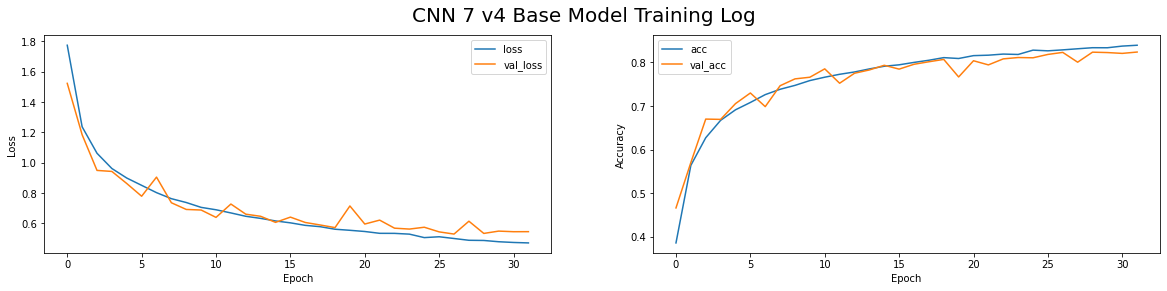

In [62]:
loss = CNN_7_v4_history.history['loss']
val_loss = CNN_7_v4_history.history['val_loss']
acc = CNN_7_v4_history.history['accuracy']
val_acc = CNN_7_v4_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 7 v4 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

As for the model training log, we can see that this combination has allowed a good and effective training while mantianing the model performance. We can also see that the model training log is good as there is no underfitting and overfitting observed

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td><b>Fine Tuning Stage</b></td>
        <td><b>Model</b></td>
        <td><b>Accuracy</b></td>
        <td><b>Precision</b></td>
        <td><b>Recall</b></td>
        <td><b>f1-score</b></td>
        <td><b>Model Training Log</b></td>
    </thead>
    <tr>
        <td><b>Building Base Model</b></td>
        <td>CNN_1 - Base Model (Based on Project Guide)</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.65</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Conv2D Layer</b></td>
        <td>CNN_2 - CNN_1 + Added Conv2d layers</td>
        <td>0.72</td>
        <td>0.73</td>
        <td>0.72</td>
        <td>0.72</td>
        <td rowspan="5" >Underfitting</td>
    </tr>
    <tr>
        <td >CNN 3 v0: CNN 2 + Neuron Combination [16,32,64]</td>
        <td>0.71</td>
        <td>0.72</td>
        <td>0.71</td>
        <td>0.71</td>
    </tr>
    <tr>
        <td>CNN 3 v1: CNN 2 + Neuron Combination [32,64,128]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v2: CNN 2 + Neuron Combination [64,128,256]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v3: CNN 2 + Neuron Combination [126, 256, 512]</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Dropout Layer</b></td>
        <td>CNN 4 v1 - CNN 3 v1 + Added Dropout layers</td>
        <td>0.68</td>
        <td>0.72</td>
        <td>0.68</td>
        <td>0.68</td>
        <td>Some Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v2: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.5]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>Slight Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v3: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5,0.6]</td>
        <td>0.76</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v4: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.3]</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v5: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5, 0.3]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>No Overfitting</td>
    </tr>
    <tr>
        <td><b>Tuning Batch Normalization Layer</b></td>
        <td>CNN 5 v1: CNN 4 v5 + Added Batch Normalization layer</td>
        <td>0.80</td>
        <td>0.81</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>Slight Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Dense Layer</b></td>
        <td>CNN 6 v1 - CNN 5 v1 + Dense Layer Value [32]</td>
        <td>0.80</td>
        <td>0.81</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>Some fluctuations</td>
    </tr>
    <tr>
        <td>CNN 6 v2 - CNN 5 v1 + Dense Layer Value [64]</td>
        <td>0.76</td>
        <td>0.79</td>
        <td>0.76</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v3 - CNN 5 v1 + Dense Layer Value [128]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>Very slight underfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v4 - CNN 5 v1 + Dense Layer Value [256]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v5 - CNN 5 v1 + Dense Layer Value [512]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.84</td>
        <td>0.83</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Activation Function</b></td>
        <td>CNN 7 v1 - CNN 6 v3 + Activation Function[Relu,Relu]</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>Very Slight underfitting</td>
    </tr>
    <tr>
        <td>CNN 7 v2 - CNN 6 v3 + Activation Function[Tanh,Tanh]</td>
        <td>0.66</td>
        <td>0.67</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>Some underfitting</td>
    </tr>
    <tr>
        <td>CNN 7 v3 - CNN 6 v3 + Activation Function[Sigmoid,Sigmoid]</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>No overfitting/underfitting</td>
    </tr>
    <tr>
        <td style="background-color:#48AAAD;color:white;">CNN 7 v3 - CNN 6 v3 + Activation Function[Relu, Tanh]</td>
        <td style="background-color:#48AAAD;color:white;">0.82</td>
        <td style="background-color:#48AAAD;color:white;">0.82</td>
        <td style="background-color:#48AAAD;color:white;">0.82</td>
        <td style="background-color:#48AAAD;color:white;">0.82</td>
        <td style="background-color:#48AAAD;color:white;">Very slight underfitting</td>
    </tr>
</table>

Even though CNN 7v1 and CNN 7 v3 has almost similar model performance, I will be using CNN 7v3 as it has slightly higher model performance of 0.002

<img src="light-bulb.png" align='left' height="50" width="70"><h2>Conclusion: CNN 7 v3 F1-Score is 82%</h2>

<a id='33'><h2 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3.3 Tuning Hyperparameters in compile function</h2>

As mentioned in the previous section, after much tuning of layers and the corresponding value, now I will be using CNN 7 v3 with the highest model performance with vert sligh underftting. In this section, I would be tuning the hyperparameters in the neural network, specifically parameters in the compile function.

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.3.1 Tuning Optimizers</h2><br>

An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy. You can use different optimizers to make changes in your weights and learning rate. However, choosing the best optimizer depends upon the application.

In [15]:
def build_CNN_8():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))

    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.4))


    model.add(Conv2D(128,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128,activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(10,activation='softmax'))
    return model 

In [315]:
def tuning_optimizers(params,results_dict):
    for i in range(len(params)):
        CNN_8_v1=build_CNN_8()
        CNN_8_v1.compile(optimizer=params[i],loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        result=CNN_8_v1.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))
        preds = CNN_8_v1.predict(X_test) 
        results_dict[params[i]]=round(f1_score(y_test,preds.argmax(axis=1),average="macro"),3)
    return results_dict
results_dict={}
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
print(tuning_optimizers(optimizer,results_dict))

Epoch 1/500
625/625 [==============================] - 6s 8ms/step - loss: 2.1966 - accuracy: 0.2740 - val_loss: 1.8890 - val_accuracy: 0.3255
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.6805 - accuracy: 0.3974 - val_loss: 1.7497 - val_accuracy: 0.3659
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 1.5054 - accuracy: 0.4579 - val_loss: 1.9929 - val_accuracy: 0.3172
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 1.3902 - accuracy: 0.5036 - val_loss: 1.6902 - val_accuracy: 0.4087
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 1.3040 - accuracy: 0.5404 - val_loss: 1.1617 - val_accuracy: 0.5901
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 1.2279 - accuracy: 0.5658 - val_loss: 1.3321 - val_accuracy: 0.5278
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1799 - accuracy: 0.5832 - val_loss: 1.1335 - val_accuracy: 0.6033

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 3.2623 - accuracy: 0.1037 - val_loss: 2.5404 - val_accuracy: 0.1105
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 3.1949 - accuracy: 0.1084 - val_loss: 2.5178 - val_accuracy: 0.1254
Epoch 3/500
625/625 [==============================] - 5s 9ms/step - loss: 3.1404 - accuracy: 0.1149 - val_loss: 2.4874 - val_accuracy: 0.1347
Epoch 4/500
625/625 [==============================] - 5s 9ms/step - loss: 3.1091 - accuracy: 0.1181 - val_loss: 2.4605 - val_accuracy: 0.1370
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 3.0633 - accuracy: 0.1252 - val_loss: 2.4337 - val_accuracy: 0.1420
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 3.0257 - accuracy: 0.1292 - val_loss: 2.4179 - val_accuracy: 0.1425
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 2.9880 - accuracy: 0.1335 - val_loss: 2.4034 - val_accuracy: 0.1439

Epoch 58/500
625/625 [==============================] - 6s 9ms/step - loss: 2.1998 - accuracy: 0.2837 - val_loss: 2.1038 - val_accuracy: 0.2528
Epoch 59/500
625/625 [==============================] - 6s 9ms/step - loss: 2.2039 - accuracy: 0.2819 - val_loss: 2.1056 - val_accuracy: 0.2538
Epoch 60/500
625/625 [==============================] - 5s 9ms/step - loss: 2.1941 - accuracy: 0.2900 - val_loss: 2.1024 - val_accuracy: 0.2550
Epoch 61/500
625/625 [==============================] - 5s 9ms/step - loss: 2.1916 - accuracy: 0.2885 - val_loss: 2.0974 - val_accuracy: 0.2561
Epoch 62/500
625/625 [==============================] - 5s 9ms/step - loss: 2.1887 - accuracy: 0.2841 - val_loss: 2.0993 - val_accuracy: 0.2548
Epoch 63/500
625/625 [==============================] - 5s 9ms/step - loss: 2.1723 - accuracy: 0.2925 - val_loss: 2.0823 - val_accuracy: 0.2597
Epoch 64/500
625/625 [==============================] - 6s 9ms/step - loss: 2.1648 - accuracy: 0.2947 - val_loss: 2.0853 - val_accuracy:

Epoch 14/500
625/625 [==============================] - 5s 8ms/step - loss: 0.5424 - accuracy: 0.8117 - val_loss: 0.5665 - val_accuracy: 0.8086
Epoch 15/500
625/625 [==============================] - 5s 8ms/step - loss: 0.5274 - accuracy: 0.8152 - val_loss: 0.5944 - val_accuracy: 0.7991
Epoch 16/500
625/625 [==============================] - 5s 8ms/step - loss: 0.5135 - accuracy: 0.8213 - val_loss: 0.5298 - val_accuracy: 0.8167
Epoch 17/500
625/625 [==============================] - 5s 8ms/step - loss: 0.4986 - accuracy: 0.8253 - val_loss: 0.5538 - val_accuracy: 0.8135
Epoch 18/500
625/625 [==============================] - 5s 8ms/step - loss: 0.4946 - accuracy: 0.8299 - val_loss: 0.5926 - val_accuracy: 0.8022
Epoch 19/500
625/625 [==============================] - 5s 8ms/step - loss: 0.4705 - accuracy: 0.8342 - val_loss: 0.5194 - val_accuracy: 0.8243
Epoch 20/500
625/625 [==============================] - 5s 9ms/step - loss: 0.4605 - accuracy: 0.8413 - val_loss: 0.5545 - val_accuracy:

Epoch 29/500
625/625 [==============================] - 6s 10ms/step - loss: 0.4400 - accuracy: 0.8456 - val_loss: 0.5745 - val_accuracy: 0.8102
Epoch 30/500
625/625 [==============================] - 6s 10ms/step - loss: 0.4288 - accuracy: 0.8498 - val_loss: 0.5200 - val_accuracy: 0.8279
Epoch 31/500
625/625 [==============================] - 6s 9ms/step - loss: 0.4213 - accuracy: 0.8529 - val_loss: 0.5130 - val_accuracy: 0.8251
Epoch 32/500
625/625 [==============================] - 6s 9ms/step - loss: 0.4133 - accuracy: 0.8536 - val_loss: 0.5304 - val_accuracy: 0.8259
Epoch 33/500
625/625 [==============================] - 6s 9ms/step - loss: 0.4169 - accuracy: 0.8530 - val_loss: 0.5148 - val_accuracy: 0.8244
Epoch 34/500
625/625 [==============================] - 6s 9ms/step - loss: 0.3998 - accuracy: 0.8605 - val_loss: 0.5189 - val_accuracy: 0.8282
Epoch 35/500
625/625 [==============================] - 6s 9ms/step - loss: 0.3915 - accuracy: 0.8630 - val_loss: 0.5072 - val_accurac

In [37]:
print("F1-score of different optimizers:",{'SGD': 0.766, 'RMSprop': 0.793, 'Adagrad': 0.308, 'Adadelta': 0.249, 'Adam': 0.832, 'Adamax': 0.828, 'Nadam': 0.825})

F1-score of different optimizers: {'SGD': 0.766, 'RMSprop': 0.793, 'Adagrad': 0.308, 'Adadelta': 0.249, 'Adam': 0.832, 'Adamax': 0.828, 'Nadam': 0.825}


After having tried a variety of optimizers, <b>Adam optimizer gives the highest f1-score of 83.2%. </b>Hence, I will be using Adam for the rest of the sections

Now I will be using the Adam Optimizer to compile the built model to record this version of the model

In [316]:
CNN_8_v1=build_CNN_8()
CNN_8_v1.compile(optimizer="Adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v1_history=CNN_8_v1.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 1.7739 - accuracy: 0.3887 - val_loss: 1.3657 - val_accuracy: 0.5158
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1923 - accuracy: 0.5783 - val_loss: 1.4811 - val_accuracy: 0.5219
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 1.0062 - accuracy: 0.6494 - val_loss: 0.9047 - val_accuracy: 0.6852
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9030 - accuracy: 0.6866 - val_loss: 0.8336 - val_accuracy: 0.7108
Epoch 5/500
625/625 [==============================] - 6s 9ms/step - loss: 0.8381 - accuracy: 0.7096 - val_loss: 0.8846 - val_accuracy: 0.6950
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7774 - accuracy: 0.7316 - val_loss: 0.7397 - val_accuracy: 0.7432
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7352 - accuracy: 0.7441 - val_loss: 0.8908 - val_accuracy: 0.6960

In [317]:
preds = CNN_8_v1.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v1.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.93      0.92      0.93      1000
           2       0.85      0.67      0.75      1000
           3       0.78      0.62      0.69      1000
           4       0.75      0.85      0.80      1000
           5       0.73      0.81      0.77      1000
           6       0.88      0.86      0.87      1000
           7       0.82      0.92      0.87      1000
           8       0.91      0.91      0.91      1000
           9       0.88      0.93      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000

313/313 - 1s - loss: 0.5231 - accuracy: 0.8354
Accuracy: 83.53999853134155
Macro F1-score: 0.8333226412165653


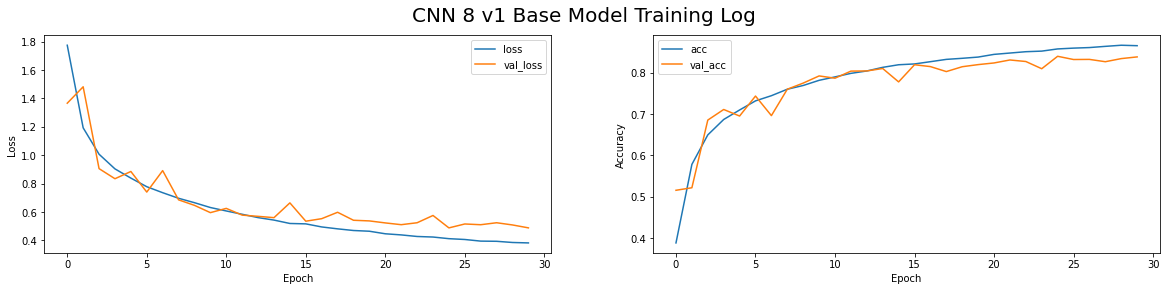

In [318]:
loss = CNN_8_v1_history.history['loss']
val_loss = CNN_8_v1_history.history['val_loss']
acc = CNN_8_v1_history.history['accuracy']
val_acc = CNN_8_v1_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v1 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.3.2 Tuning Learning Rate</h2><br>

Next, I will be tuning the learning rate parameter, where I will be trying learning rate ranging from 0.1 to 0.00001 for the Adamx optimizer to see which will increase the current f1-score

## 3.3.2.1 Learning Rate=0.1

In [319]:
CNN_8_v2=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.1)
CNN_8_v2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v2_history=CNN_8_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 2.1246 - accuracy: 0.2587 - val_loss: 5.2166 - val_accuracy: 0.1919
Epoch 2/500
625/625 [==============================] - 5s 9ms/step - loss: 1.7956 - accuracy: 0.3737 - val_loss: 1.3790 - val_accuracy: 0.5251
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 1.6197 - accuracy: 0.4536 - val_loss: 1.6773 - val_accuracy: 0.4954
Epoch 4/500
625/625 [==============================] - 5s 9ms/step - loss: 1.4628 - accuracy: 0.5099 - val_loss: 1.7416 - val_accuracy: 0.4663
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 1.5256 - accuracy: 0.4888 - val_loss: 1.8363 - val_accuracy: 0.4367
Epoch 6/500
625/625 [==============================] - 5s 9ms/step - loss: 1.4027 - accuracy: 0.5301 - val_loss: 1.1645 - val_accuracy: 0.5966
Epoch 7/500
625/625 [==============================] - 5s 9ms/step - loss: 1.3129 - accuracy: 0.5691 - val_loss: 1.4521 - val_accuracy: 0.5398

In [320]:
preds = CNN_8_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1000
           1       0.90      0.86      0.88      1000
           2       0.60      0.59      0.60      1000
           3       0.72      0.27      0.40      1000
           4       0.55      0.74      0.63      1000
           5       0.84      0.51      0.64      1000
           6       0.96      0.48      0.64      1000
           7       0.68      0.86      0.76      1000
           8       0.48      0.97      0.64      1000
           9       0.85      0.81      0.83      1000

    accuracy                           0.68     10000
   macro avg       0.73      0.68      0.67     10000
weighted avg       0.73      0.68      0.67     10000

313/313 - 1s - loss: 1.1557 - accuracy: 0.6767
Accuracy: 67.66999959945679
Macro F1-score: 0.6684897418173119


When learning rate is 0.1, the model f1-score dropped to 67%. Hence, the learning rate may be too high for the model to learn any useful things, hence I will be increasing the learning rate in the next section.

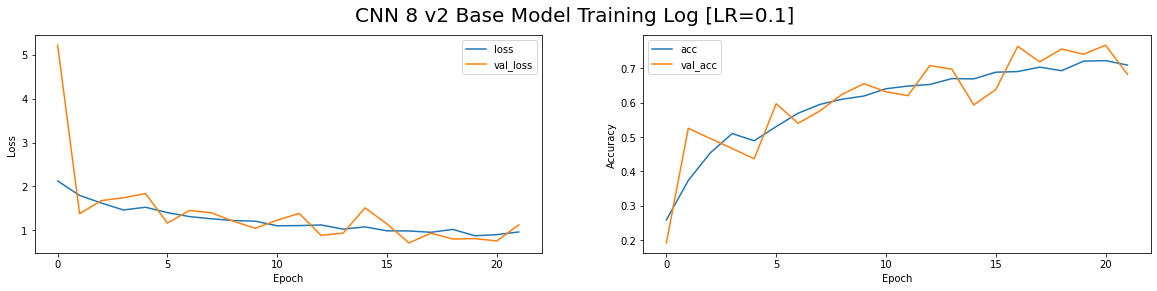

In [321]:
loss = CNN_8_v2_history.history['loss']
val_loss = CNN_8_v2_history.history['val_loss']
acc = CNN_8_v2_history.history['accuracy']
val_acc = CNN_8_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v2 Base Model Training Log [LR=0.1]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

From the model training log, we can see that there are frequent fluctuation from the validation and training loss/acc. There is alos high loss and low accuracy. Hence, we will be lowering the learning rate in the next section for the model to learn more effectively.

## 3.3.2.2 Learning Rate=0.01

In [322]:
CNN_8_v2=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.01)
CNN_8_v2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v2_history=CNN_8_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 1.6211 - accuracy: 0.4224 - val_loss: 1.5663 - val_accuracy: 0.5030
Epoch 2/500
625/625 [==============================] - 5s 9ms/step - loss: 1.1373 - accuracy: 0.5996 - val_loss: 1.2593 - val_accuracy: 0.5665
Epoch 3/500
625/625 [==============================] - 6s 9ms/step - loss: 0.9714 - accuracy: 0.6606 - val_loss: 1.4261 - val_accuracy: 0.5053
Epoch 4/500
625/625 [==============================] - 5s 9ms/step - loss: 0.8897 - accuracy: 0.6931 - val_loss: 0.9513 - val_accuracy: 0.6939
Epoch 5/500
625/625 [==============================] - 6s 9ms/step - loss: 0.8191 - accuracy: 0.7171 - val_loss: 0.7718 - val_accuracy: 0.7362
Epoch 6/500
625/625 [==============================] - 5s 9ms/step - loss: 0.7777 - accuracy: 0.7317 - val_loss: 0.7168 - val_accuracy: 0.7556
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 0.7443 - accuracy: 0.7451 - val_loss: 0.8636 - val_accuracy: 0.7186

In [323]:
preds = CNN_8_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1000
           1       0.94      0.88      0.91      1000
           2       0.84      0.60      0.70      1000
           3       0.56      0.74      0.63      1000
           4       0.71      0.81      0.75      1000
           5       0.68      0.78      0.73      1000
           6       0.80      0.89      0.84      1000
           7       0.96      0.69      0.81      1000
           8       0.93      0.82      0.87      1000
           9       0.80      0.94      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000

313/313 - 1s - loss: 0.6515 - accuracy: 0.7882
Accuracy: 78.82000207901001
Macro F1-score: 0.7904081714872032


When learning rate was increased to 0.01, the accuracy increased to 78% however, it was still lower than the previous CNN 7v3. Hence, I will still be increasing the learning rate.

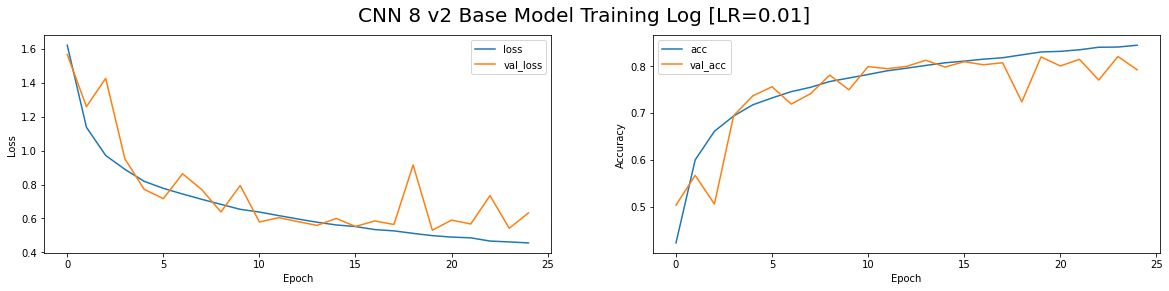

In [324]:
loss = CNN_8_v2_history.history['loss']
val_loss = CNN_8_v2_history.history['val_loss']
acc = CNN_8_v2_history.history['accuracy']
val_acc = CNN_8_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v2 Base Model Training Log [LR=0.01]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

From the model training log, we can see that the learning curve is not good as there are frequent deviation from the training loss to the validation loss. Hence, We will still be lowering the learning rate for it learning more effectively

## 3.3.2.3 Learning Rate=0.001

In [325]:
CNN_8_v2=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.001)
CNN_8_v2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v2_history=CNN_8_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 7s 9ms/step - loss: 1.7560 - accuracy: 0.3928 - val_loss: 1.7854 - val_accuracy: 0.3920
Epoch 2/500
625/625 [==============================] - 6s 9ms/step - loss: 1.1847 - accuracy: 0.5814 - val_loss: 1.0157 - val_accuracy: 0.6448
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 1.0035 - accuracy: 0.6493 - val_loss: 1.0962 - val_accuracy: 0.6131
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9045 - accuracy: 0.6842 - val_loss: 0.8271 - val_accuracy: 0.7104
Epoch 5/500
625/625 [==============================] - 5s 9ms/step - loss: 0.8461 - accuracy: 0.7056 - val_loss: 0.7868 - val_accuracy: 0.7271
Epoch 6/500
625/625 [==============================] - 5s 9ms/step - loss: 0.7860 - accuracy: 0.7270 - val_loss: 0.7347 - val_accuracy: 0.7445
Epoch 7/500
625/625 [==============================] - 5s 9ms/step - loss: 0.7439 - accuracy: 0.7419 - val_loss: 0.7056 - val_accuracy: 0.7537

In [326]:
preds = CNN_8_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1000
           1       0.92      0.93      0.93      1000
           2       0.78      0.72      0.75      1000
           3       0.75      0.61      0.68      1000
           4       0.78      0.82      0.80      1000
           5       0.72      0.80      0.76      1000
           6       0.90      0.83      0.86      1000
           7       0.78      0.93      0.85      1000
           8       0.88      0.92      0.90      1000
           9       0.90      0.91      0.91      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

313/313 - 1s - loss: 0.5384 - accuracy: 0.8270
Accuracy: 82.70000219345093
Macro F1-score: 0.8254859540046618


Now that the learning rate is lowered to 0.001, the model performance has inceased back to 82 to 83% range.

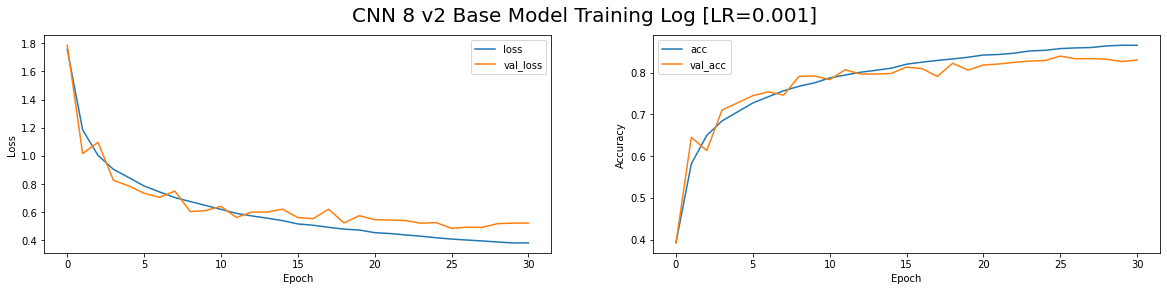

In [327]:
loss = CNN_8_v2_history.history['loss']
val_loss = CNN_8_v2_history.history['val_loss']
acc = CNN_8_v2_history.history['accuracy']
val_acc = CNN_8_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v2 Base Model Training Log [LR=0.001]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can also see from the model training log that the graph is more stable with a smaller gap between the training and validation accuracy/loss. However, I would still be lowering the learning rate to close the gap more.

## 3.3.2.4 Learning Rate=0.0001

In [328]:
CNN_8_v2=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
CNN_8_v2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v2_history=CNN_8_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 2.4466 - accuracy: 0.2306 - val_loss: 2.3999 - val_accuracy: 0.1716
Epoch 2/500
625/625 [==============================] - 5s 9ms/step - loss: 1.9214 - accuracy: 0.3459 - val_loss: 2.1018 - val_accuracy: 0.2725
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 1.7221 - accuracy: 0.4011 - val_loss: 2.0953 - val_accuracy: 0.2984
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 1.5755 - accuracy: 0.4477 - val_loss: 1.6765 - val_accuracy: 0.4199
Epoch 5/500
625/625 [==============================] - 6s 9ms/step - loss: 1.4444 - accuracy: 0.4932 - val_loss: 1.6654 - val_accuracy: 0.4355
Epoch 6/500
625/625 [==============================] - 6s 9ms/step - loss: 1.3379 - accuracy: 0.5329 - val_loss: 1.3682 - val_accuracy: 0.5244
Epoch 7/500
625/625 [==============================] - 6s 9ms/step - loss: 1.2514 - accuracy: 0.5602 - val_loss: 1.3745 - val_accuracy: 0.5286

In [329]:
preds = CNN_8_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1000
           1       0.96      0.89      0.92      1000
           2       0.78      0.69      0.73      1000
           3       0.70      0.60      0.65      1000
           4       0.72      0.84      0.78      1000
           5       0.73      0.77      0.75      1000
           6       0.76      0.91      0.83      1000
           7       0.88      0.84      0.86      1000
           8       0.87      0.92      0.89      1000
           9       0.86      0.92      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

313/313 - 1s - loss: 0.5648 - accuracy: 0.8114
Accuracy: 81.13999962806702
Macro F1-score: 0.8100927103686075


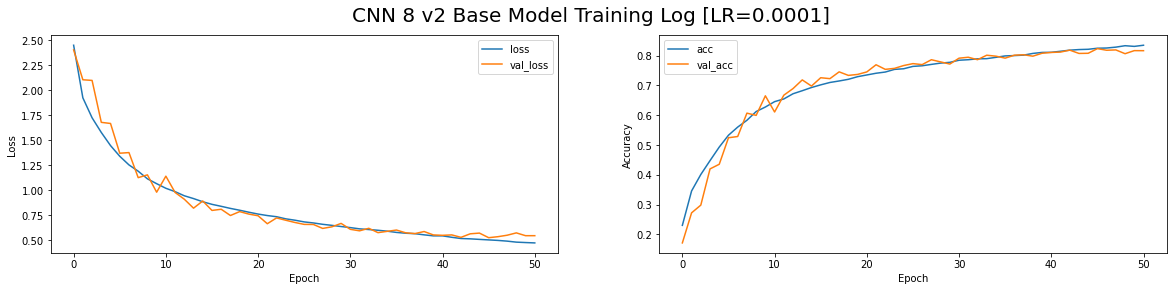

In [330]:
loss = CNN_8_v2_history.history['loss']
val_loss = CNN_8_v2_history.history['val_loss']
acc = CNN_8_v2_history.history['accuracy']
val_acc = CNN_8_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v2 Base Model Training Log [LR=0.0001]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

When the learning rate decreased to 0.0001, the model training log loks very good as the validation and training loss and accuracy looks very aligned. However the model performance is compromised by 0.01. Hence, we may need to increase the learning rate by abit to increase the model performance. 

<b>I will be trying learning rate from 0.0002 to 0.0005. Note that I will be writing all my analysis after the trying out all the learning rate for easier comparison</b>

## 3.3.2.5 Learning Rate=0.0002

In [331]:
CNN_8_v2=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.0002)
CNN_8_v2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v2_history=CNN_8_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 2.2337 - accuracy: 0.2813 - val_loss: 1.9861 - val_accuracy: 0.3018
Epoch 2/500
625/625 [==============================] - 6s 9ms/step - loss: 1.6515 - accuracy: 0.4285 - val_loss: 1.6601 - val_accuracy: 0.4424
Epoch 3/500
625/625 [==============================] - 5s 9ms/step - loss: 1.4030 - accuracy: 0.5072 - val_loss: 1.4512 - val_accuracy: 0.5081
Epoch 4/500
625/625 [==============================] - 6s 9ms/step - loss: 1.2516 - accuracy: 0.5600 - val_loss: 1.1921 - val_accuracy: 0.5904
Epoch 5/500
625/625 [==============================] - 5s 9ms/step - loss: 1.1454 - accuracy: 0.5993 - val_loss: 1.1588 - val_accuracy: 0.6021
Epoch 6/500
625/625 [==============================] - 5s 9ms/step - loss: 1.0531 - accuracy: 0.6314 - val_loss: 1.0919 - val_accuracy: 0.6235
Epoch 7/500
625/625 [==============================] - 5s 9ms/step - loss: 0.9925 - accuracy: 0.6532 - val_loss: 0.8531 - val_accuracy: 0.7051

In [332]:
preds = CNN_8_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1000
           1       0.95      0.86      0.90      1000
           2       0.84      0.60      0.70      1000
           3       0.71      0.61      0.66      1000
           4       0.64      0.89      0.75      1000
           5       0.81      0.67      0.73      1000
           6       0.79      0.89      0.84      1000
           7       0.88      0.86      0.87      1000
           8       0.81      0.94      0.87      1000
           9       0.80      0.95      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

313/313 - 1s - loss: 0.6294 - accuracy: 0.8012
Accuracy: 80.11999726295471
Macro F1-score: 0.7984919900421775


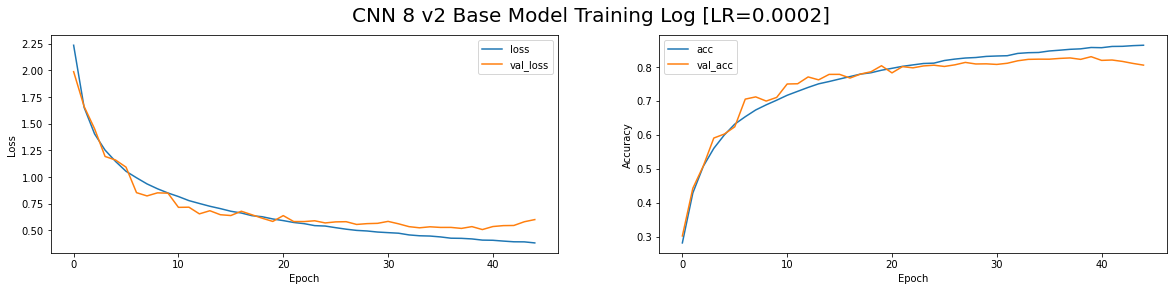

In [333]:
loss = CNN_8_v2_history.history['loss']
val_loss = CNN_8_v2_history.history['val_loss']
acc = CNN_8_v2_history.history['accuracy']
val_acc = CNN_8_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v2 Base Model Training Log [LR=0.0002]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 3.3.2.6 Learning Rate=0.0003

In [334]:
CNN_8_v2=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.0003)
CNN_8_v2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v2_history=CNN_8_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 2.0603 - accuracy: 0.3167 - val_loss: 1.9737 - val_accuracy: 0.3068
Epoch 2/500
625/625 [==============================] - 6s 9ms/step - loss: 1.5104 - accuracy: 0.4718 - val_loss: 1.4775 - val_accuracy: 0.4832
Epoch 3/500
625/625 [==============================] - 6s 9ms/step - loss: 1.2765 - accuracy: 0.5530 - val_loss: 1.1260 - val_accuracy: 0.6053
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1306 - accuracy: 0.6023 - val_loss: 1.1446 - val_accuracy: 0.6082
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 1.0297 - accuracy: 0.6395 - val_loss: 0.9358 - val_accuracy: 0.6739
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9565 - accuracy: 0.6658 - val_loss: 0.9789 - val_accuracy: 0.6639
Epoch 7/500
625/625 [==============================] - 5s 8ms/step - loss: 0.9016 - accuracy: 0.6865 - val_loss: 0.8006 - val_accuracy: 0.7224

In [335]:
preds = CNN_8_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.93      0.92      0.92      1000
           2       0.83      0.67      0.74      1000
           3       0.70      0.69      0.69      1000
           4       0.80      0.78      0.79      1000
           5       0.76      0.76      0.76      1000
           6       0.89      0.84      0.86      1000
           7       0.77      0.92      0.84      1000
           8       0.89      0.89      0.89      1000
           9       0.85      0.92      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

313/313 - 1s - loss: 0.5359 - accuracy: 0.8234
Accuracy: 82.34000205993652
Macro F1-score: 0.8222587933595203


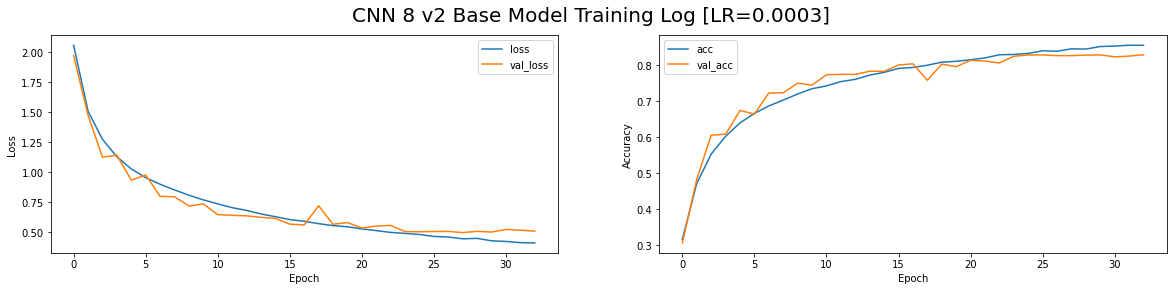

In [336]:
loss = CNN_8_v2_history.history['loss']
val_loss = CNN_8_v2_history.history['val_loss']
acc = CNN_8_v2_history.history['accuracy']
val_acc = CNN_8_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v2 Base Model Training Log [LR=0.0003]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 3.3.2.7 Learning Rate=0.0004

In [337]:
CNN_8_v2=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.0004)
CNN_8_v2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v2_history=CNN_8_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 9s 10ms/step - loss: 2.0329 - accuracy: 0.3246 - val_loss: 2.4200 - val_accuracy: 0.2448
Epoch 2/500
625/625 [==============================] - 6s 9ms/step - loss: 1.4398 - accuracy: 0.4941 - val_loss: 1.4471 - val_accuracy: 0.5075
Epoch 3/500
625/625 [==============================] - 6s 9ms/step - loss: 1.2051 - accuracy: 0.5778 - val_loss: 1.1593 - val_accuracy: 0.6043
Epoch 4/500
625/625 [==============================] - 6s 9ms/step - loss: 1.0649 - accuracy: 0.6257 - val_loss: 0.9577 - val_accuracy: 0.6559
Epoch 5/500
625/625 [==============================] - 6s 9ms/step - loss: 0.9700 - accuracy: 0.6627 - val_loss: 0.8813 - val_accuracy: 0.6933
Epoch 6/500
625/625 [==============================] - 6s 9ms/step - loss: 0.9022 - accuracy: 0.6830 - val_loss: 0.8180 - val_accuracy: 0.7142
Epoch 7/500
625/625 [==============================] - 6s 10ms/step - loss: 0.8467 - accuracy: 0.7040 - val_loss: 0.7409 - val_accuracy: 0.74

In [338]:
preds = CNN_8_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1000
           1       0.96      0.88      0.92      1000
           2       0.75      0.75      0.75      1000
           3       0.73      0.60      0.66      1000
           4       0.71      0.86      0.78      1000
           5       0.83      0.66      0.74      1000
           6       0.72      0.93      0.81      1000
           7       0.90      0.83      0.86      1000
           8       0.83      0.94      0.88      1000
           9       0.86      0.93      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

313/313 - 1s - loss: 0.5755 - accuracy: 0.8131
Accuracy: 81.30999803543091
Macro F1-score: 0.8112449783515515


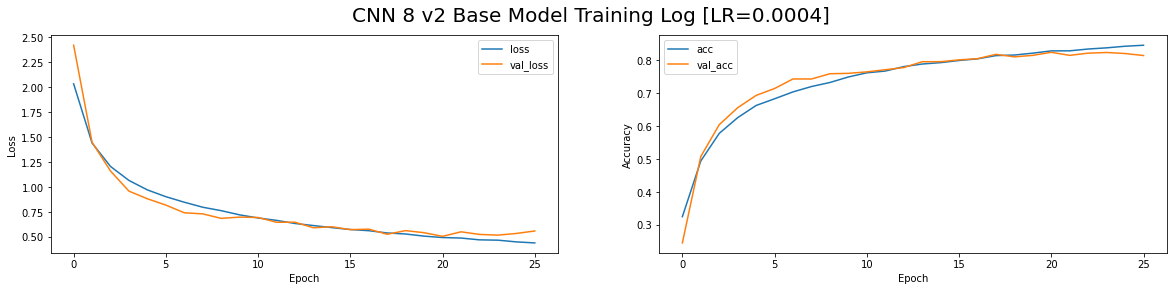

In [339]:
loss = CNN_8_v2_history.history['loss']
val_loss = CNN_8_v2_history.history['val_loss']
acc = CNN_8_v2_history.history['accuracy']
val_acc = CNN_8_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v2 Base Model Training Log [LR=0.0004]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 3.3.2.8 Learning Rate=0.0005

In [340]:
CNN_8_v2=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.0005)
CNN_8_v2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v2_history=CNN_8_v2.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 1.9438 - accuracy: 0.3471 - val_loss: 2.2221 - val_accuracy: 0.2946
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.3546 - accuracy: 0.5203 - val_loss: 1.6773 - val_accuracy: 0.4403
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 1.1282 - accuracy: 0.6021 - val_loss: 0.9135 - val_accuracy: 0.6838
Epoch 4/500
625/625 [==============================] - 6s 10ms/step - loss: 0.9943 - accuracy: 0.6529 - val_loss: 0.9025 - val_accuracy: 0.6855
Epoch 5/500
625/625 [==============================] - 6s 10ms/step - loss: 0.9092 - accuracy: 0.6840 - val_loss: 0.8024 - val_accuracy: 0.7186
Epoch 6/500
625/625 [==============================] - 5s 9ms/step - loss: 0.8426 - accuracy: 0.7078 - val_loss: 0.7621 - val_accuracy: 0.7297
Epoch 7/500
625/625 [==============================] - 5s 9ms/step - loss: 0.7976 - accuracy: 0.7215 - val_loss: 0.9249 - val_accuracy: 0.68

In [341]:
preds = CNN_8_v2.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v2.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1000
           1       0.93      0.90      0.91      1000
           2       0.75      0.74      0.75      1000
           3       0.71      0.63      0.67      1000
           4       0.80      0.73      0.76      1000
           5       0.76      0.77      0.76      1000
           6       0.70      0.93      0.80      1000
           7       0.91      0.82      0.86      1000
           8       0.88      0.91      0.90      1000
           9       0.88      0.90      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

313/313 - 1s - loss: 0.5501 - accuracy: 0.8146
Accuracy: 81.45999908447266
Macro F1-score: 0.8142266023523238


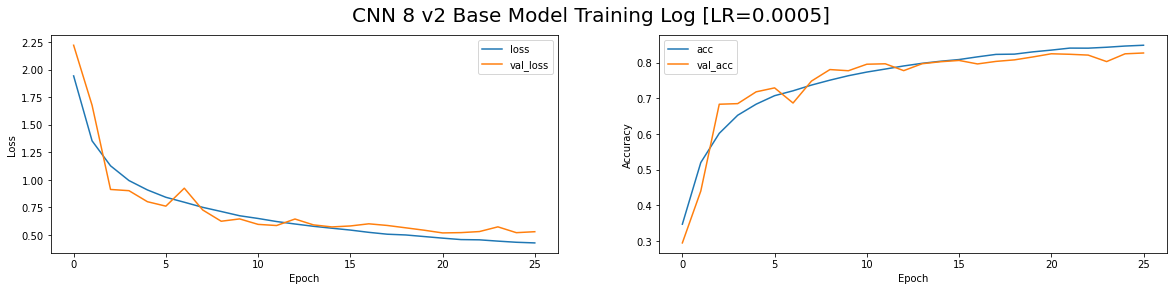

In [343]:
loss = CNN_8_v2_history.history['loss']
val_loss = CNN_8_v2_history.history['val_loss']
acc = CNN_8_v2_history.history['accuracy']
val_acc = CNN_8_v2_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v2 Base Model Training Log [LR=0.0005]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Insights: 
<b>Learning rate of 0.0004</b> is the best learning rate as the allows for a good model performance of  81% for f1 score while ensuring that the validation acc/loss is closely aligned to training acc/loss.

For other learning rate, it either comprises on the model performance or the model training process. Hence when lr=0.0004 , it gives the best balance between the both/

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.3.3 Tuning Batch Size</h2><br>

<b>I will be trying tuning with batch size of 16,32,64,128. Note that I will be writing all my analysis after the trying out all the learning rate for easier comparison</b>

## 3.3.3.1 Batch Size=16

In [344]:
CNN_8_v3=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.0004)
CNN_8_v3.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v3_history=CNN_8_v3.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
2500/2500 [==============================] - 17s 7ms/step - loss: 1.8880 - accuracy: 0.3559 - val_loss: 1.3933 - val_accuracy: 0.5132
Epoch 2/500
2500/2500 [==============================] - 16s 6ms/step - loss: 1.3139 - accuracy: 0.5409 - val_loss: 1.1937 - val_accuracy: 0.5808
Epoch 3/500
2500/2500 [==============================] - 16s 6ms/step - loss: 1.1014 - accuracy: 0.6195 - val_loss: 0.8326 - val_accuracy: 0.7067
Epoch 4/500
2500/2500 [==============================] - 16s 6ms/step - loss: 0.9861 - accuracy: 0.6591 - val_loss: 0.7741 - val_accuracy: 0.7288
Epoch 5/500
2500/2500 [==============================] - 16s 6ms/step - loss: 0.9094 - accuracy: 0.6864 - val_loss: 0.7436 - val_accuracy: 0.7427
Epoch 6/500
2500/2500 [==============================] - 17s 7ms/step - loss: 0.8487 - accuracy: 0.7092 - val_loss: 0.6972 - val_accuracy: 0.7613
Epoch 7/500
2500/2500 [==============================] - 19s 7ms/step - loss: 0.8047 - accuracy: 0.7250 - val_loss: 0.6473 -

In [345]:
preds = CNN_8_v3.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v3.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.90      0.94      0.92      1000
           2       0.85      0.68      0.75      1000
           3       0.77      0.63      0.69      1000
           4       0.77      0.85      0.81      1000
           5       0.74      0.80      0.77      1000
           6       0.87      0.87      0.87      1000
           7       0.84      0.90      0.87      1000
           8       0.87      0.91      0.89      1000
           9       0.91      0.90      0.91      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

313/313 - 1s - loss: 0.5013 - accuracy: 0.8350
Accuracy: 83.49999785423279
Macro F1-score: 0.8328463791656908


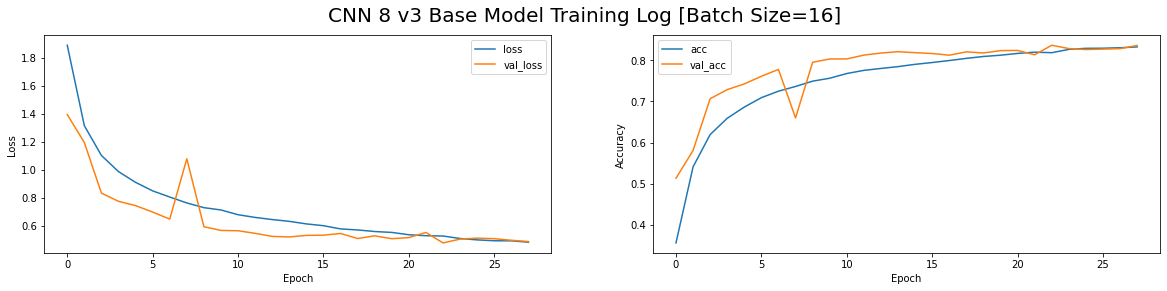

In [346]:
loss = CNN_8_v3_history.history['loss']
val_loss = CNN_8_v3_history.history['val_loss']
acc = CNN_8_v3_history.history['accuracy']
val_acc = CNN_8_v3_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v3 Base Model Training Log [Batch Size=16]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 3.3.3.2 Batch Size=32

In [347]:
CNN_8_v3=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.0004)
CNN_8_v3.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v3_history=CNN_8_v3.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8911 - accuracy: 0.3573 - val_loss: 1.7674 - val_accuracy: 0.4124
Epoch 2/500
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3134 - accuracy: 0.5364 - val_loss: 1.0244 - val_accuracy: 0.6411
Epoch 3/500
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0937 - accuracy: 0.6159 - val_loss: 0.9149 - val_accuracy: 0.6817
Epoch 4/500
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9888 - accuracy: 0.6574 - val_loss: 0.8343 - val_accuracy: 0.7071
Epoch 5/500
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9081 - accuracy: 0.6833 - val_loss: 0.7532 - val_accuracy: 0.7390
Epoch 6/500
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8387 - accuracy: 0.7102 - val_loss: 0.8203 - val_accuracy: 0.7146
Epoch 7/500
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7948 - accuracy: 0.7249 - val_loss: 0.6844 - val_

In [348]:
preds = CNN_8_v3.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v3.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1000
           1       0.94      0.91      0.93      1000
           2       0.78      0.75      0.77      1000
           3       0.74      0.66      0.70      1000
           4       0.73      0.88      0.80      1000
           5       0.79      0.74      0.76      1000
           6       0.79      0.91      0.84      1000
           7       0.90      0.86      0.88      1000
           8       0.89      0.93      0.91      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000

313/313 - 1s - loss: 0.5133 - accuracy: 0.8351
Accuracy: 83.5099995136261
Macro F1-score: 0.8345594456176757


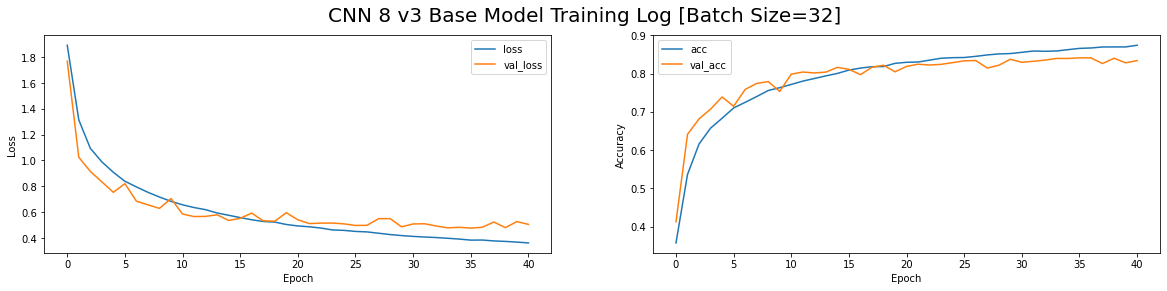

In [349]:
loss = CNN_8_v3_history.history['loss']
val_loss = CNN_8_v3_history.history['val_loss']
acc = CNN_8_v3_history.history['accuracy']
val_acc = CNN_8_v3_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v3 Base Model Training Log [Batch Size=32]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 3.3.3.3 Batch Size=64

In [350]:
CNN_8_v3=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.0004)
CNN_8_v3.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v3_history=CNN_8_v3.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
625/625 [==============================] - 6s 9ms/step - loss: 2.0138 - accuracy: 0.3297 - val_loss: 2.1024 - val_accuracy: 0.2905
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 1.4688 - accuracy: 0.4812 - val_loss: 1.2335 - val_accuracy: 0.5637
Epoch 3/500
625/625 [==============================] - 5s 9ms/step - loss: 1.2094 - accuracy: 0.5734 - val_loss: 1.1751 - val_accuracy: 0.5868
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 1.0637 - accuracy: 0.6277 - val_loss: 0.9778 - val_accuracy: 0.6531
Epoch 5/500
625/625 [==============================] - 5s 9ms/step - loss: 0.9771 - accuracy: 0.6557 - val_loss: 0.9198 - val_accuracy: 0.6791
Epoch 6/500
625/625 [==============================] - 5s 9ms/step - loss: 0.9026 - accuracy: 0.6851 - val_loss: 0.8608 - val_accuracy: 0.6998
Epoch 7/500
625/625 [==============================] - 5s 9ms/step - loss: 0.8509 - accuracy: 0.7017 - val_loss: 0.9001 - val_accuracy: 0.6912

In [351]:
preds = CNN_8_v3.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v3.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1000
           1       0.89      0.94      0.92      1000
           2       0.82      0.68      0.74      1000
           3       0.70      0.62      0.66      1000
           4       0.79      0.80      0.79      1000
           5       0.72      0.80      0.76      1000
           6       0.75      0.92      0.83      1000
           7       0.89      0.86      0.87      1000
           8       0.92      0.89      0.90      1000
           9       0.89      0.90      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

313/313 - 1s - loss: 0.5427 - accuracy: 0.8215
Accuracy: 82.15000033378601
Macro F1-score: 0.8202548959781236


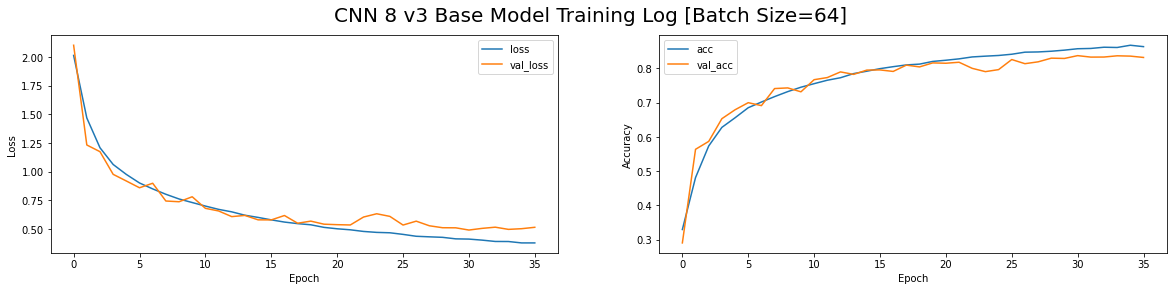

In [352]:
loss = CNN_8_v3_history.history['loss']
val_loss = CNN_8_v3_history.history['val_loss']
acc = CNN_8_v3_history.history['accuracy']
val_acc = CNN_8_v3_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v3 Base Model Training Log [Batch Size=64]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 3.3.3.4 Batch Size=128

In [16]:
CNN_8_v3=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.0004)
CNN_8_v3.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v3_history=CNN_8_v3.fit(X_train, y_train, epochs=500, batch_size=128, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
313/313 [==============================] - 10s 16ms/step - loss: 2.1770 - accuracy: 0.2878 - val_loss: 3.9801 - val_accuracy: 0.1008
Epoch 2/500
313/313 [==============================] - 4s 14ms/step - loss: 1.6460 - accuracy: 0.4177 - val_loss: 2.2256 - val_accuracy: 0.3109
Epoch 3/500
313/313 [==============================] - 4s 14ms/step - loss: 1.4107 - accuracy: 0.4973 - val_loss: 1.2811 - val_accuracy: 0.5520
Epoch 4/500
313/313 [==============================] - 4s 14ms/step - loss: 1.2762 - accuracy: 0.5489 - val_loss: 1.2783 - val_accuracy: 0.5571
Epoch 5/500
313/313 [==============================] - 4s 14ms/step - loss: 1.1857 - accuracy: 0.5814 - val_loss: 1.4520 - val_accuracy: 0.4995
Epoch 6/500
313/313 [==============================] - 4s 14ms/step - loss: 1.0979 - accuracy: 0.6169 - val_loss: 1.1311 - val_accuracy: 0.6099
Epoch 7/500
313/313 [==============================] - 4s 14ms/step - loss: 1.0352 - accuracy: 0.6386 - val_loss: 1.0858 - val_accuracy

In [354]:
preds = CNN_8_v3.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v3.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1000
           1       0.94      0.87      0.90      1000
           2       0.77      0.62      0.69      1000
           3       0.65      0.59      0.62      1000
           4       0.68      0.84      0.75      1000
           5       0.79      0.61      0.69      1000
           6       0.71      0.91      0.80      1000
           7       0.87      0.81      0.84      1000
           8       0.82      0.90      0.86      1000
           9       0.77      0.93      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000

313/313 - 1s - loss: 0.6602 - accuracy: 0.7804
Accuracy: 78.03999781608582
Macro F1-score: 0.7774112270954031


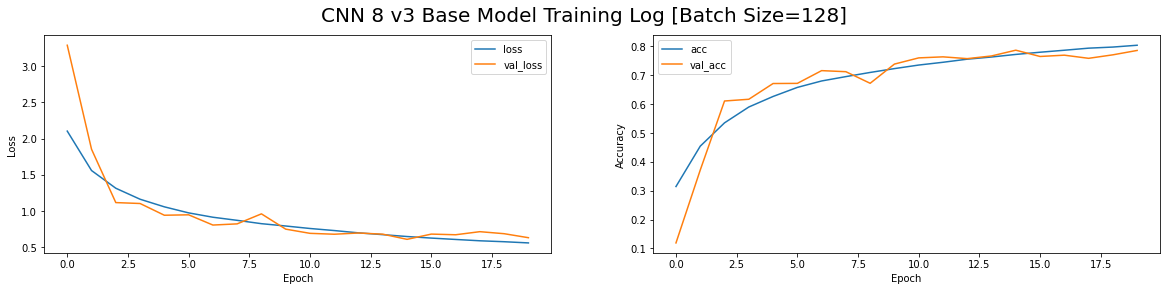

In [355]:
loss = CNN_8_v3_history.history['loss']
val_loss = CNN_8_v3_history.history['val_loss']
acc = CNN_8_v3_history.history['accuracy']
val_acc = CNN_8_v3_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v3 Base Model Training Log [Batch Size=128]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Insights: 
<b>Batch size of 32</b> is the best learning rate as the allows for the BEST model performance of 83.5% which is currently the best model perfromance achieved. It has comprised just a little on the model training. However, I will be solving it data auugmentation

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.3.4 Tuning Loss Function</h2><br>

In [252]:
def tuning_loss_function(params,results_dict):
    for i in range(len(params)):
        CNN_8_v4=build_CNN_8()
        optimizer = tf.keras.optimizers.Adam(lr=0.0004)
        CNN_8_v4.compile(optimizer=optimizer,loss=params[i],metrics=['accuracy'])
        result=CNN_8_v4.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2,
                      callbacks=[es_callback],validation_data=(X_test, y_test))
        preds = CNN_8_v4.predict(X_test) 
        results_dict[params[i]]=round(f1_score(y_test,preds.argmax(axis=1),average="macro"),3)
    return results_dict
results_dict={}
loss_function=['sparse_categorical_crossentropy','mean_squared_logarithmic_error','mean_squared_error','hinge','kullback_leibler_divergence']
print(tuning_loss_function(loss_function,results_dict))

Epoch 1/500
313/313 [==============================] - 5s 15ms/step - loss: 2.2327 - accuracy: 0.2944 - val_loss: 3.5216 - val_accuracy: 0.1240
Epoch 2/500
313/313 [==============================] - 4s 14ms/step - loss: 1.6791 - accuracy: 0.4292 - val_loss: 1.8480 - val_accuracy: 0.3458
Epoch 3/500
313/313 [==============================] - 4s 13ms/step - loss: 1.4412 - accuracy: 0.5010 - val_loss: 1.2119 - val_accuracy: 0.5796
Epoch 4/500
313/313 [==============================] - 4s 14ms/step - loss: 1.2714 - accuracy: 0.5578 - val_loss: 1.0369 - val_accuracy: 0.6337
Epoch 5/500
313/313 [==============================] - 4s 14ms/step - loss: 1.1426 - accuracy: 0.6018 - val_loss: 1.0177 - val_accuracy: 0.6508
Epoch 6/500
313/313 [==============================] - 4s 14ms/step - loss: 1.0651 - accuracy: 0.6290 - val_loss: 0.9709 - val_accuracy: 0.6663
Epoch 7/500
313/313 [==============================] - 4s 14ms/step - loss: 0.9928 - accuracy: 0.6532 - val_loss: 1.0027 - val_accuracy:

In [38]:
print("F1-score of different loss function:",{'sparse_categorical_crossentropy': 0.814, 'mean_squared_logarithmic_error': 0.035, 'mean_squared_error': 0.075, 'hinge': 0.035, 'kullback_leibler_divergence': 0.073})

F1-score of different loss function: {'sparse_categorical_crossentropy': 0.814, 'mean_squared_logarithmic_error': 0.035, 'mean_squared_error': 0.075, 'hinge': 0.035, 'kullback_leibler_divergence': 0.073}


After having tried a variety of loss function, <b>the loss function sparse_categorical_crossentropy gives the highest f1-score of 81%. </b>Hence, I will continue to use sparse_categorical_crossentropy in the later sections

In [358]:
CNN_8_v4=build_CNN_8()
optimizer = tf.keras.optimizers.Adam(lr=0.0004)
CNN_8_v4.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN_8_v4_history=CNN_8_v4.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

Epoch 1/500
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9175 - accuracy: 0.3552 - val_loss: 1.6902 - val_accuracy: 0.4035
Epoch 2/500
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3492 - accuracy: 0.5243 - val_loss: 1.2262 - val_accuracy: 0.5685
Epoch 3/500
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1177 - accuracy: 0.6086 - val_loss: 0.9235 - val_accuracy: 0.6765
Epoch 4/500
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9929 - accuracy: 0.6556 - val_loss: 0.8302 - val_accuracy: 0.7084
Epoch 5/500
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9085 - accuracy: 0.6841 - val_loss: 0.8928 - val_accuracy: 0.6932
Epoch 6/500
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8399 - accuracy: 0.7065 - val_loss: 0.7325 - val_accuracy: 0.7414
Epoch 7/500
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7946 - accuracy: 0.7252 - val_loss: 0.6678 - val_ac

Now I will be using the sparse_categorical_crossentropy loss function to compile the built model to record this version of the model

In [361]:
preds = CNN_8_v4.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_8_v4.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.92      0.93      0.92      1000
           2       0.83      0.67      0.74      1000
           3       0.75      0.61      0.67      1000
           4       0.70      0.87      0.78      1000
           5       0.75      0.78      0.77      1000
           6       0.85      0.88      0.87      1000
           7       0.86      0.88      0.87      1000
           8       0.92      0.86      0.89      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000

313/313 - 1s - loss: 0.5291 - accuracy: 0.8264
Accuracy: 82.63999819755554
Macro F1-score: 0.8245499349288821


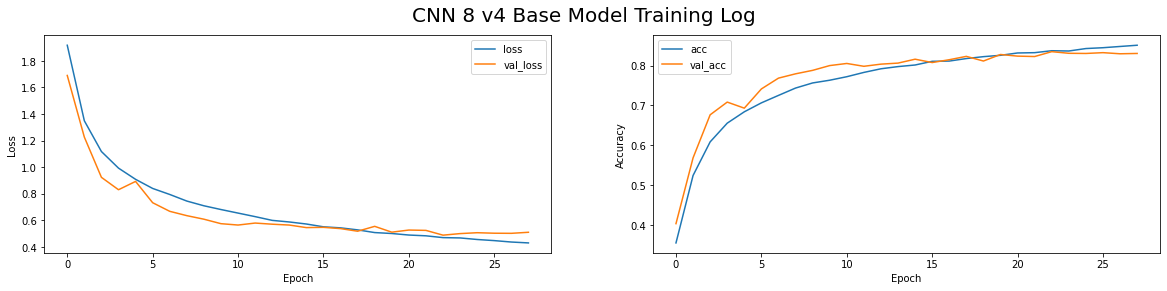

In [362]:
loss = CNN_8_v4_history.history['loss']
val_loss = CNN_8_v4_history.history['val_loss']
acc = CNN_8_v4_history.history['accuracy']
val_acc = CNN_8_v4_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 8 v4 Base Model Training Log",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

This will be the final model training log after tuning all hyperparameters in the compile function. As shown there is very sligh underfitting towards the end which I will be testing out with data augmentation to solve the issue.

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.3.5 Building CNN_3_v2 with Best Combination of Parameter</h2><br>

TO summarize, the best combination of hyperparamters would be:<br>

1. <b>Optimizer: Adam</b>
2. <b>Learning Rate: 0.0004</b>
3. <b>sparse_categorical_crossentropy</b>
4. <b>batch size: 32</b>

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td><b>Fine Tuning Stage</b></td>
        <td><b>Model</b></td>
        <td><b>Accuracy</b></td>
        <td><b>Precision</b></td>
        <td><b>Recall</b></td>
        <td><b>f1-score</b></td>
        <td><b>Model Training Log</b></td>
    </thead>
    <tr>
        <td><b>Building Base Model</b></td>
        <td>CNN_1 - Base Model (Based on Project Guide)</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.65</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Conv2D Layer</b></td>
        <td>CNN_2 - CNN_1 + Added Conv2d layers</td>
        <td>0.72</td>
        <td>0.73</td>
        <td>0.72</td>
        <td>0.72</td>
        <td rowspan="5" >Underfitting</td>
    </tr>
    <tr>
        <td >CNN 3 v0: CNN 2 + Neuron Combination [16,32,64]</td>
        <td>0.71</td>
        <td>0.72</td>
        <td>0.71</td>
        <td>0.71</td>
    </tr>
    <tr>
        <td>CNN 3 v1: CNN 2 + Neuron Combination [32,64,128]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v2: CNN 2 + Neuron Combination [64,128,256]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v3: CNN 2 + Neuron Combination [126, 256, 512]</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Dropout Layer</b></td>
        <td>CNN 4 v1 - CNN 3 v1 + Added Dropout layers</td>
        <td>0.68</td>
        <td>0.72</td>
        <td>0.68</td>
        <td>0.68</td>
        <td>Some Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v2: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.5]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>Slight Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v3: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5,0.6]</td>
        <td>0.76</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v4: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.3]</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v5: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5, 0.3]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>No Overfitting</td>
    </tr>
    <tr>
        <td><b>Tuning Batch Normalization Layer</b></td>
        <td>CNN 5 v1: CNN 4 v5 + Added Batch Normalization layer</td>
        <td>0.80</td>
        <td>0.81</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>Slight Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Dense Layer</b></td>
        <td>CNN 6 v1 - CNN 5 v1 + Dense Layer Value [32]</td>
        <td>0.80</td>
        <td>0.81</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>Some fluctuations</td>
    </tr>
    <tr>
        <td>CNN 6 v2 - CNN 5 v1 + Dense Layer Value [64]</td>
        <td>0.76</td>
        <td>0.79</td>
        <td>0.76</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v3 - CNN 5 v1 + Dense Layer Value [128]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>Very slight underfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v4 - CNN 5 v1 + Dense Layer Value [256]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v5 - CNN 5 v1 + Dense Layer Value [512]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.84</td>
        <td>0.83</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="4"><b>Tuning Activation Function</b></td>
        <td>CNN 7 v1 - CNN 6 v3 + Activation Function[Relu,Relu]</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>Very Slight underfitting</td>
    </tr>
    <tr>
        <td>CNN 7 v2 - CNN 6 v3 + Activation Function[Tanh,Tanh]</td>
        <td>0.66</td>
        <td>0.67</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>Some underfitting</td>
    </tr>
    <tr>
        <td>CNN 7 v3 - CNN 6 v3 + Activation Function[Sigmoid,Sigmoid]</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td>CNN 7 v3 - CNN 6 v3 + Activation Function[Relu, Tanh]</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>Very slight underfitting</td>
    </tr>
    <tr>
        <td><b>Tuning Hyperparameters in compile function</b></td>
        <td style="background-color:#48AAAD;color:white;">CNN 8 v4 [Adam,lr=0.0004,sparse_categorical_crossentropy, batch size= 32]</td>
        <td style="background-color:#48AAAD;color:white;">0.83</td>
        <td style="background-color:#48AAAD;color:white;">0.83</td>
        <td style="background-color:#48AAAD;color:white;">0.83</td>
        <td style="background-color:#48AAAD;color:white;">0.82</td>
        <td style="background-color:#48AAAD;color:white;">Very Very slight underfitting</td>
    </tr>  
    
</table>

<img src="light-bulb.png" align='left' height="50" width="70"><h2>Conclusion: CNN 8 v4[With Tuned Hyperparameters] F1-Score is 82%</h2>

<a id='34'><h2 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3.4 Tuning Images with Data Augmentation</h2>

For this section, we will be using CNN 8 version 4 with the tuned parameters in the previous section. 

In this section, I will be using data augementation, as it is useful a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize.

In [15]:
def build_CNN_9():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))

    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.4))


    model.add(Conv2D(128,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3),activation="relu", padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128,activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(10,activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(lr=0.0004)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model 

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.4.1 Without Data Augmentation</h2><br>

These are the images before data augmentation

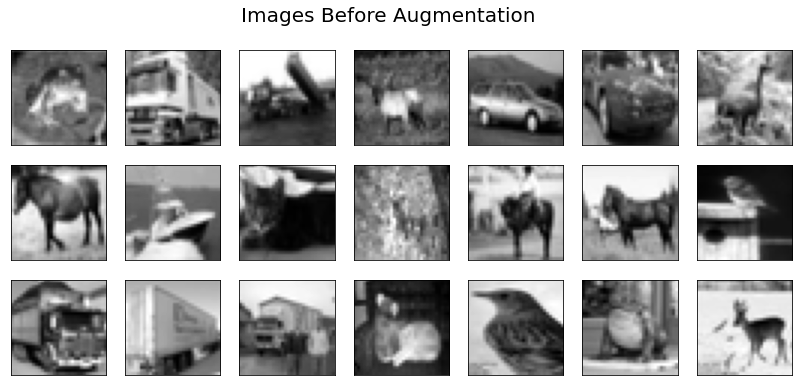

In [369]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.suptitle("Images Before Augmentation",fontsize=20)
for i in range(21):
    plt.subplot(3,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

First, I will be building the model with no data augmentation for better comparison in the later stage

In [22]:
CNN_9_v1_no_aug = build_CNN_9()

history_no_aug = CNN_9_v1_no_aug.fit(X_train, y_train, epochs=500, batch_size=128, verbose=1, validation_split=0.2,
              callbacks=[es_callback],validation_data=(X_test, y_test))

loss_no_aug, acc_no_aug = CNN_9_v1_no_aug.evaluate(X_test,  y_test)

Epoch 1/500
313/313 [==============================] - 5s 14ms/step - loss: 2.2105 - accuracy: 0.2857 - val_loss: 4.0425 - val_accuracy: 0.1335
Epoch 2/500
313/313 [==============================] - 4s 13ms/step - loss: 1.6681 - accuracy: 0.4110 - val_loss: 1.9409 - val_accuracy: 0.3568
Epoch 3/500
313/313 [==============================] - 4s 13ms/step - loss: 1.4548 - accuracy: 0.4828 - val_loss: 1.3865 - val_accuracy: 0.5066
Epoch 4/500
313/313 [==============================] - 4s 13ms/step - loss: 1.2827 - accuracy: 0.5455 - val_loss: 1.2886 - val_accuracy: 0.5457
Epoch 5/500
313/313 [==============================] - 4s 13ms/step - loss: 1.1718 - accuracy: 0.5881 - val_loss: 1.0920 - val_accuracy: 0.6149
Epoch 6/500
313/313 [==============================] - 4s 13ms/step - loss: 1.0912 - accuracy: 0.6197 - val_loss: 1.0606 - val_accuracy: 0.6252
Epoch 7/500
313/313 [==============================] - 4s 13ms/step - loss: 1.0251 - accuracy: 0.6420 - val_loss: 0.9748 - val_accuracy:

In [370]:
preds = CNN_9_v1_no_aug.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_9_v1_no_aug.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1000
           1       0.94      0.89      0.92      1000
           2       0.82      0.66      0.73      1000
           3       0.67      0.64      0.65      1000
           4       0.71      0.85      0.77      1000
           5       0.71      0.76      0.74      1000
           6       0.77      0.90      0.83      1000
           7       0.91      0.83      0.87      1000
           8       0.84      0.93      0.88      1000
           9       0.88      0.91      0.90      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

313/313 - 1s - loss: 0.5794 - accuracy: 0.8109
Accuracy: 81.08999729156494
Macro F1-score: 0.8103610834021039


We can see from the results, that with no data augmentation, model results is at 81% for f1-score, accuracy, precision and recall. Now I will be augmenting the data, where I will be flipping the image with the Horizontal and Vertical Shift/Flip Augmentation

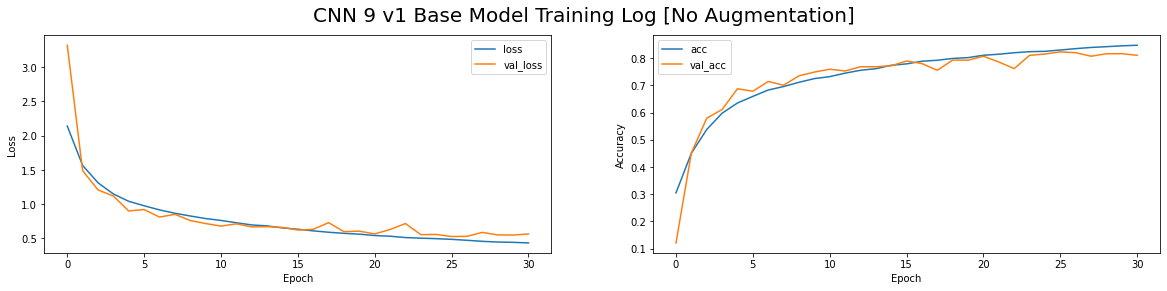

In [372]:
loss = history_no_aug.history['loss']
val_loss = history_no_aug.history['val_loss']
acc = history_no_aug.history['accuracy']
val_acc = history_no_aug.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 9 v1 Base Model Training Log [No Augmentation]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can see the model training log is quite good with very slight fluctuation at some point

<h2 style="padding:5px;color:blue;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:15px;">3.4.2 With Data Augmentation</h2><br>

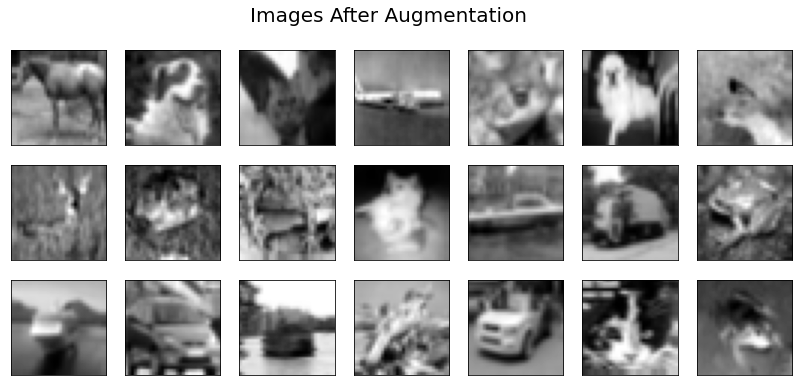

In [16]:
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    plt.suptitle("Images After Augmentation",fontsize=20)
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i],cmap='gray')
        class_index = categories[i].argmax()
        #plt.xlabel(class_names[class_index])
    plt.show()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
width_shift = 1.0
height_shift = 1.0
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(X_train)

it = datagen.flow(X_train, y_train, shuffle=True)
batch_images, batch_labels = next(it)
visualize_data(batch_images, batch_labels, class_names)

In [17]:
CNN_9_v1_with_aug = build_CNN_9()
datagen.fit(X_train)

history_aug = CNN_9_v1_with_aug.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2,validation_data=(X_test, y_test))
loss_aug, acc_aug = CNN_9_v1_with_aug.evaluate(X_test,  y_test)

Epoch 1/50
1250/1250 [==============================] - 12s 6ms/step - loss: 1.9941 - accuracy: 0.3242 - val_loss: 1.6944 - val_accuracy: 0.3993
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4991 - accuracy: 0.4637 - val_loss: 1.3555 - val_accuracy: 0.5066
Epoch 3/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2612 - accuracy: 0.5567 - val_loss: 1.1094 - val_accuracy: 0.6053
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1307 - accuracy: 0.6076 - val_loss: 0.9817 - val_accuracy: 0.6575
Epoch 5/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0403 - accuracy: 0.6393 - val_loss: 0.9481 - val_accuracy: 0.6716
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9805 - accuracy: 0.6604 - val_loss: 0.8269 - val_accuracy: 0.7110
Epoch 7/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9320 - accuracy: 0.6780 - val_loss: 0.9518 - val_accuracy

In [18]:
preds = CNN_9_v1_with_aug.predict(X_test) 
print(classification_report(y_test,preds.argmax(axis=1)))
accuracy = CNN_9_v1_with_aug.evaluate(X_test, y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(y_test,preds.argmax(axis=1),average="macro"))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1000
           1       0.94      0.92      0.93      1000
           2       0.76      0.71      0.73      1000
           3       0.71      0.64      0.67      1000
           4       0.67      0.89      0.76      1000
           5       0.80      0.72      0.76      1000
           6       0.84      0.88      0.86      1000
           7       0.86      0.88      0.87      1000
           8       0.83      0.94      0.88      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000

313/313 - 1s - loss: 0.5775 - accuracy: 0.8151
Accuracy: 81.51000142097473
Macro F1-score: 0.8137635956327902


With data augmentation, results have improved by 0.003%. This is because the model is exposed to a wider variety of different images that allows model to learn better and generalize when faced with unseen images or images in another variation

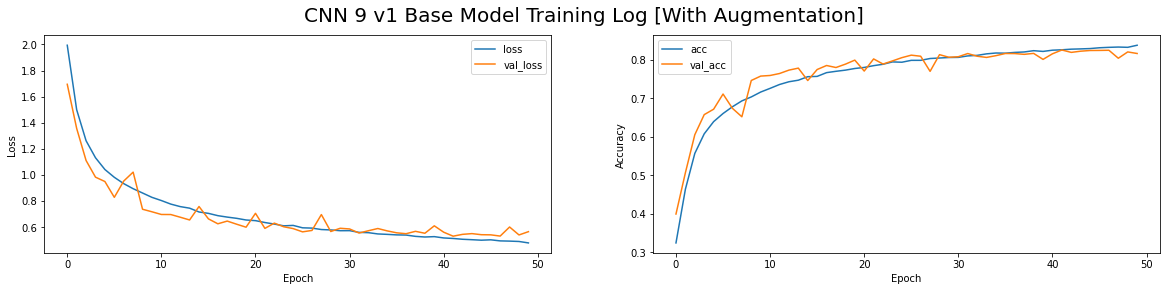

In [19]:
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("CNN 9 v1 Base Model Training Log [With Augmentation]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

As shown in the model training log, there is no signs of underfitting or overfitting as the train loss augmented  and the original train loss is in one single line. The loss is minimal and the the test accuracy of the augmented dataset is around the same value as the non-augmented dataset. Hence, the data augmentation can be keeped as the model performance and the training log is good. 

Also, the model seems more stable as there are more data points of the validation loss/acc aligned with the training loss/acc

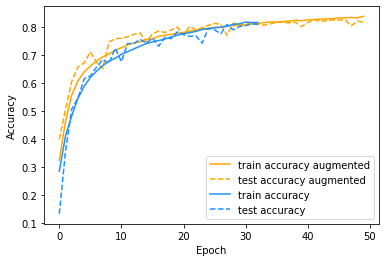

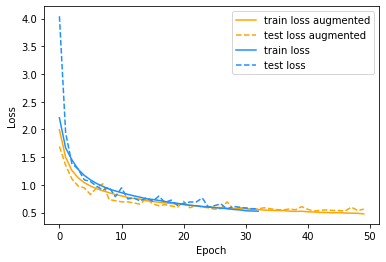

In [23]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(history_aug.history['accuracy'],
         label='train accuracy augmented',
         c='orange', ls='-')
plt.plot(history_aug.history['val_accuracy'],
         label='test accuracy augmented',
         c='orange',ls='--')

plt.plot(history_no_aug.history['accuracy'],
         label='train accuracy',
         c='dodgerblue', ls='-')
plt.plot(history_no_aug.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(history_aug.history['loss'],
         label='train loss augmented',
         c='orange', ls='-')
plt.plot(history_aug.history['val_loss'],
         label='test loss augmented',
         c='orange',ls='--')

plt.plot(history_no_aug.history['loss'],
         label='train loss',
         c='dodgerblue', ls='-')
plt.plot(history_no_aug.history['val_loss'],
         label='test loss',
         c='dodgerblue', ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#### In conclusion, I have managed to achieve a relatively good model where the model has NO SIGNS of OVERFITTING or UNDERFITTING with a decent f1-score 81%.

<img src="light-bulb.png" align='left' height="50" width="70"><h2>Conclusion: CNN 9 v1[With Augmentation] F1-Score is 81%</h2>

<a id='35'><h2 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3.5 Model Comparison</h2>

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td><b>Fine Tuning Stage</b></td>
        <td><b>Model</b></td>
        <td><b>Accuracy</b></td>
        <td><b>Precision</b></td>
        <td><b>Recall</b></td>
        <td><b>f1-score</b></td>
        <td><b>Model Training Log</b></td>
    </thead>
    <tr>
        <td><b>Building Base Model</b></td>
        <td>CNN_1 - Base Model (Based on Project Guide)</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>0.65</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Conv2D Layer</b></td>
        <td>CNN_2 - CNN_1 + Added Conv2d layers</td>
        <td>0.72</td>
        <td>0.73</td>
        <td>0.72</td>
        <td>0.72</td>
        <td rowspan="5" >Underfitting</td>
    </tr>
    <tr>
        <td >CNN 3 v0: CNN 2 + Neuron Combination [16,32,64]</td>
        <td>0.71</td>
        <td>0.72</td>
        <td>0.71</td>
        <td>0.71</td>
    </tr>
    <tr>
        <td>CNN 3 v1: CNN 2 + Neuron Combination [32,64,128]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v2: CNN 2 + Neuron Combination [64,128,256]</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>CNN 3 v3: CNN 2 + Neuron Combination [126, 256, 512]</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
        <td>0.74</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Dropout Layer</b></td>
        <td>CNN 4 v1 - CNN 3 v1 + Added Dropout layers</td>
        <td>0.68</td>
        <td>0.72</td>
        <td>0.68</td>
        <td>0.68</td>
        <td>Some Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v2: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.5]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>Slight Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v3: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5,0.6]</td>
        <td>0.76</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v4: CNN 3 v1 + Dropout Combination [0.2, 0.3, 0.4, 0.3]</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.77</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 4 v5: CNN 3 v1 + Dropout Combination [0.3, 0.4, 0.5, 0.3]</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>No Overfitting</td>
    </tr>
    <tr>
        <td><b>Tuning Batch Normalization Layer</b></td>
        <td>CNN 5 v1: CNN 4 v5 + Added Batch Normalization layer</td>
        <td>0.80</td>
        <td>0.81</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>Slight Underfitting</td>
    </tr>
    <tr>
        <td rowspan="5"><b>Tuning Dense Layer</b></td>
        <td>CNN 6 v1 - CNN 5 v1 + Dense Layer Value [32]</td>
        <td>0.80</td>
        <td>0.81</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>Some fluctuations</td>
    </tr>
    <tr>
        <td>CNN 6 v2 - CNN 5 v1 + Dense Layer Value [64]</td>
        <td>0.76</td>
        <td>0.79</td>
        <td>0.76</td>
        <td>0.76</td>
        <td>Overfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v3 - CNN 5 v1 + Dense Layer Value [128]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>Very slight underfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v4 - CNN 5 v1 + Dense Layer Value [256]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td>CNN 6 v5 - CNN 5 v1 + Dense Layer Value [512]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.84</td>
        <td>0.83</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td rowspan="4"><b>Tuning Activation Function</b></td>
        <td>CNN 7 v1 - CNN 6 v3 + Activation Function[Relu,Relu]</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>Very Slight underfitting</td>
    </tr>
    <tr>
        <td>CNN 7 v2 - CNN 6 v3 + Activation Function[Tanh,Tanh]</td>
        <td>0.66</td>
        <td>0.67</td>
        <td>0.66</td>
        <td>0.66</td>
        <td>Some underfitting</td>
    </tr>
    <tr>
        <td>CNN 7 v3 - CNN 6 v3 + Activation Function[Sigmoid,Sigmoid]</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>Underfitting</td>
    </tr>
    <tr>
        <td>CNN 7 v3 - CNN 6 v3 + Activation Function[Relu, Tanh]</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>Very slight underfitting</td>
    </tr>
    <tr>
        <td><b>Tuning Hyperparameters in compile function</b></td>
        <td>CNN 8 v4 [Adam,lr=0.0004,sparse_categorical_crossentropy, batch size= 32]</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.83</td>
        <td>0.82</td>
        <td>Very Very slight underfitting</td>
    </tr>  
    <tr>
        <td><b>Adding Data Augmentation</b></td>
        <td style="background-color:#48AAAD;color:white;">CNN 9 v1: CNN 8 v4 + with Data Augmentation</td>
        <td style="background-color:#48AAAD;color:white;">0.81</td>
        <td style="background-color:#48AAAD;color:white;">0.82</td>
        <td style="background-color:#48AAAD;color:white;">0.82</td>
        <td style="background-color:#48AAAD;color:white;">0.81</td>
        <td style="background-color:#48AAAD;color:white;"><b>No underfitting/No overfitting</b></td>
    </tr>  
    
</table>

After much tuning, I have came to the conclusion that CNN 9 version 1 will be the model used for predictions as it has the highest model perfromance of 81% f1-score/accuracy/precision/recall. Even though some versions of the other model has a higher model performance but there was always some imperfections in the model training process. It is a trade off between the model training and the model performance. 

Thus, CNN 9 v1 have managed to achieved a good performance of  81% for f1-score and there is not slight overfitting or underfitting throughout the training process. Hence, we will be using this will be the final model that I will settle with. 

<a id='36'><h2 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3.6 Conclusion</h2>

For PART A, I have gone through the whole data pipeline from data understanding, preparation,modelling, evaluation, prediction and finally comparison of models. To optimize the performance of the model, I have tried many tuning methodologeis to constantly balance the model performance and training. I hope this report will provide great value to you and assist you to find the best model that will derive the most accurate and precise predictions.


# PART B - Cifar-10 Colored Dataset

<a id='11'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">1. Data Understanding of Cifar-10 Colored Dataset</h2>

In [101]:
import tarfile
tar = tarfile.open('cifar-10-python.tar.gz', "r:gz")
tar.extractall()
tar.close()
for i in tar:
    print(i)

<TarInfo 'cifar-10-batches-py' at 0x2102e01a040>
<TarInfo 'cifar-10-batches-py/data_batch_4' at 0x20ff3bdd280>
<TarInfo 'cifar-10-batches-py/readme.html' at 0x20ff3bddd00>
<TarInfo 'cifar-10-batches-py/test_batch' at 0x20ff3bdd040>
<TarInfo 'cifar-10-batches-py/data_batch_3' at 0x20ff3bdd100>
<TarInfo 'cifar-10-batches-py/batches.meta' at 0x20ff3bdd340>
<TarInfo 'cifar-10-batches-py/data_batch_2' at 0x20ff3bdd640>
<TarInfo 'cifar-10-batches-py/data_batch_5' at 0x20ff3bdd400>
<TarInfo 'cifar-10-batches-py/data_batch_1' at 0x20ff3bdd700>


In [102]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
colored_train_batch1=unpickle('cifar-10-batches-py/data_batch_1')
colored_train_batch2=unpickle('cifar-10-batches-py/data_batch_2')
colored_train_batch3=unpickle('cifar-10-batches-py/data_batch_3')
colored_train_batch4=unpickle('cifar-10-batches-py/data_batch_4')
colored_train_batch5=unpickle('cifar-10-batches-py/data_batch_5')

colored_test_batch=unpickle('cifar-10-batches-py/test_batch')

<a id='22'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">2. Data Preparation/EDA of Cifar-10 Colored Dataset</h2>

In [103]:
x_data_temp=[]
y_data_temp=[]
x_test_data_temp=[]
y_test_data_temp=[]

In [104]:
x_data_temp.append(colored_train_batch1[b'data'])
y_data_temp.append(colored_train_batch1[b'labels'])
x_data_temp.append(colored_train_batch2[b'data'])
y_data_temp.append(colored_train_batch2[b'labels'])
x_data_temp.append(colored_train_batch3[b'data'])
y_data_temp.append(colored_train_batch3[b'labels'])
x_data_temp.append(colored_train_batch4[b'data'])
y_data_temp.append(colored_train_batch4[b'labels'])
x_data_temp.append(colored_train_batch5[b'data'])
y_data_temp.append(colored_train_batch5[b'labels'])

x_data=np.array(x_data_temp)
y_data=np.array(y_data_temp)

print(x_data.shape)
print(y_data.shape)

(5, 10000, 3072)
(5, 10000)


In [105]:
x_test_data_temp.append(colored_test_batch[b'data'])
y_test_data_temp.append(colored_test_batch[b'labels'])

x_test_data=np.array(x_test_data_temp)
y_test_data=np.array(y_test_data_temp)

print(x_test_data.shape)
print(y_test_data.shape)

(1, 10000, 3072)
(1, 10000)


In [106]:
x_train_1=x_data.reshape(x_data.shape[0]*x_data.shape[1],x_data.shape[2])
y_train_1=y_data.reshape(y_data.shape[0]*y_data.shape[1])

x_test_1=x_test_data.reshape(x_test_data.shape[0]*x_test_data.shape[1],x_test_data.shape[2])
y_test_1=y_test_data.reshape(y_test_data.shape[0]*y_test_data.shape[1])

print(x_train_1.shape)
print(y_train_1.shape)
print(x_test_1.shape)
print(y_test_1.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


In [107]:
colored_X_train=x_train_1.reshape(x_train_1.shape[0],32,32,3)
colored_y_train=y_train_1

colored_X_test=x_test_1.reshape(x_test_1.shape[0],32,32,3)
colored_y_test=y_test_1

print(colored_X_train.shape)
print(colored_y_train.shape)
print(colored_X_test.shape)
print(colored_y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [108]:
colored_X_train=colored_X_train.astype("float32")
colored_X_test=colored_X_test.astype("float32")

<a id='333'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3.Modelling/Evaluation/Prediction of Cifar-10 Colored Dataset</h2>

<a id='3331'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3.1 Using and Tweaking previous model for input dataset on cifar-10 colored dataset </h2>

## Part A: Building Model

Now i will be using the previous best performing model fo CNN_9_v1 and i will be tweaking the input shape from (32,32,1) to (32,32,3) as we are dealing colored images which have 3 channels this time round

In [114]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))


model.add(Conv2D(128,(3,3),activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [110]:
optimizer = tf.keras.optimizers.Adam(lr=0.0004)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_history=model.fit(colored_X_train, colored_y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2,validation_data=(colored_X_test, colored_y_test))

Epoch 1/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.1070 - accuracy: 0.2809 - val_loss: 1.6908 - val_accuracy: 0.3788
Epoch 2/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6703 - accuracy: 0.3908 - val_loss: 1.5200 - val_accuracy: 0.4483
Epoch 3/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5265 - accuracy: 0.4512 - val_loss: 1.5438 - val_accuracy: 0.4499
Epoch 4/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4402 - accuracy: 0.4827 - val_loss: 1.4436 - val_accuracy: 0.4948
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3657 - accuracy: 0.5131 - val_loss: 1.4427 - val_accuracy: 0.4915
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3131 - accuracy: 0.5346 - val_loss: 1.2824 - val_accuracy: 0.5381
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2645 - accuracy: 0.5530 - val_loss: 1.3672 - val_accuracy:

## Part B: Model Evaluation

In [24]:
preds = model.predict(colored_X_test) 
print(classification_report(colored_y_test,preds.argmax(axis=1)))
accuracy = model.evaluate(colored_X_test, colored_y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(colored_y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1000
           1       0.78      0.87      0.82      1000
           2       0.58      0.63      0.61      1000
           3       0.53      0.45      0.48      1000
           4       0.72      0.59      0.65      1000
           5       0.58      0.70      0.63      1000
           6       0.68      0.85      0.75      1000
           7       0.78      0.74      0.76      1000
           8       0.89      0.74      0.81      1000
           9       0.87      0.75      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

313/313 - 1s - loss: 0.8741 - accuracy: 0.7078
Accuracy: 70.77999711036682
Macro F1-score: 0.706955065217025


From the model performance, when we apply the previous model on the cifar-10 colored dataset, the model perfromance dropped 40% around around 80% to 70% which is 10% drop.

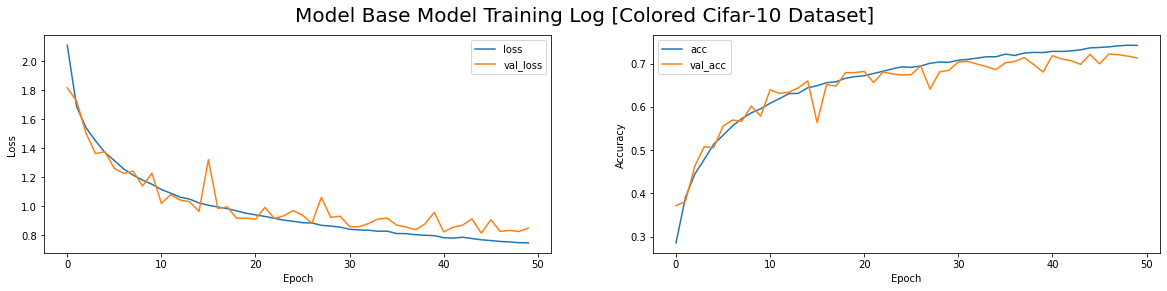

In [25]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("Model Base Model Training Log [Colored Cifar-10 Dataset]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Although there are no overfitting or underfitting signs, however, there are multiple fluctuations in the model training process

<img src="light-bulb.png" align='left' height="50" width="70"><h2>Conclusion: Colored Model F1-Score is 71%</h2>

## Part C: Analyzing and Explaining the performance

There may be 2 reasons for the drop in the model performance 
Firstly, there are more noise in colored dataset as given that there is colored images, there are more features, edges and higher image complexity for the model to train during the process. Hence there is more noise while model is training and may affect
Secondly, model is fine tuned to the gray scale dataset hence, most of the parameterss in the CNN model is tailored for classifying the image qualities and features in the gray scale. Hence when the model is applied on the colored images, it will affect the model performance slightly as the model may not be trained as well to recognize the colored images.

## Part D: Tuning with Data Augmentation

Now, I will be trying out with data augmentation to increase the model performance

In [113]:
width_shift = 1.0
height_shift = 1.0
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(colored_X_train)
it = datagen.flow(colored_X_train, colored_y_train, shuffle=True)
batch_images, batch_labels = next(it)

In [115]:
optimizer = tf.keras.optimizers.Adam(lr=0.0004)
datagen.fit(colored_X_train)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
colored_history_aug = model.fit(colored_X_train, colored_y_train, epochs=60, batch_size=32, verbose=1, validation_split=0.2,validation_data=(colored_X_test,colored_y_test))


Epoch 1/60
1250/1250 [==============================] - 10s 7ms/step - loss: 2.0763 - accuracy: 0.2904 - val_loss: 1.7061 - val_accuracy: 0.3976
Epoch 2/60
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6631 - accuracy: 0.3984 - val_loss: 1.6195 - val_accuracy: 0.4296
Epoch 3/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5132 - accuracy: 0.4575 - val_loss: 1.5322 - val_accuracy: 0.4578
Epoch 4/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4272 - accuracy: 0.4897 - val_loss: 1.3220 - val_accuracy: 0.5236
Epoch 5/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3584 - accuracy: 0.5145 - val_loss: 1.2898 - val_accuracy: 0.5380
Epoch 6/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3007 - accuracy: 0.5405 - val_loss: 1.3517 - val_accuracy: 0.5268
Epoch 7/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2524 - accuracy: 0.5577 - val_loss: 1.7758 - val_accuracy

In [118]:
###### preds = model.predict(colored_X_test) 
print(classification_report(colored_y_test,preds.argmax(axis=1)))
accuracy = model.evaluate(colored_X_test, colored_y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)
print('Macro F1-score:',f1_score(colored_y_test,preds.argmax(axis=1),average="macro"))


              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1000
           1       0.87      0.82      0.84      1000
           2       0.71      0.51      0.59      1000
           3       0.51      0.49      0.50      1000
           4       0.62      0.72      0.67      1000
           5       0.59      0.65      0.62      1000
           6       0.70      0.82      0.75      1000
           7       0.77      0.78      0.78      1000
           8       0.85      0.83      0.84      1000
           9       0.80      0.81      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

313/313 - 1s - loss: 0.8283 - accuracy: 0.7210
Accuracy: 72.10000157356262
Macro F1-score: 0.7166387065975547


After data augmentation the f1-score has increased by 0.01 from 71% to 72%. 

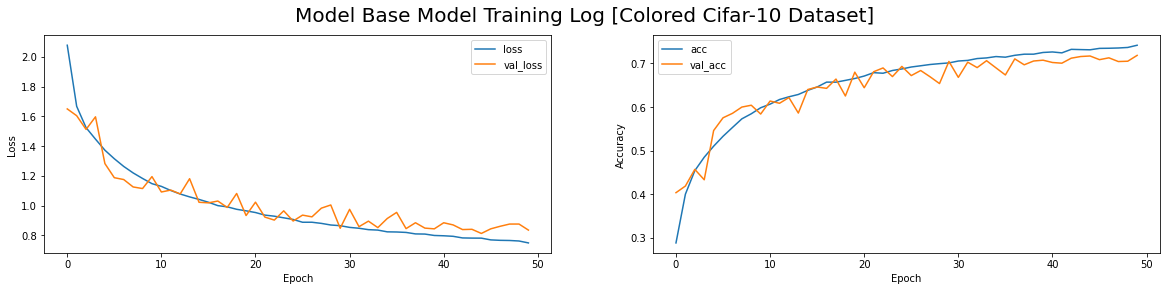

In [100]:
loss = colored_history_aug.history['loss']
val_loss = colored_history_aug.history['val_loss']
acc = colored_history_aug.history['accuracy']
val_acc = colored_history_aug.history['val_accuracy']
epoch = range(len(loss))
plt.figure(figsize=(20, 4))
plt.suptitle("Model Base Model Training Log [Colored Cifar-10 Dataset]",fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

As for the model training log, there is slight difference from the non-augmented training log where towards the end where there is less fluctuations/deviations from validation and training towards the ends of the model training/

<img src="light-bulb.png" align='left' height="50" width="70"><h2>Conclusion: Colored Model with Data Augmentation F1-Score is 73%</h2>